<a href="https://colab.research.google.com/github/JoeyBarlia/Superstore-Analysis/blob/main/Superstore_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px

#import plotly.graph_objects as go
#from plotly.subplots import make_subplots





In [356]:
df = pd.read_csv('SuperStoreOrders.csv')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [357]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


It seems that at some point, order_date was entered in a different format. dd/mm/yyyy to yyyy-mm-dd. Lets standardize.

In [358]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

 'Sales' is numeric and should not be an object.

In [360]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

Check for null values

In [361]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [362]:
df['sales'] = df['sales'].fillna(0)

Text(0, 0.5, 'Profit')

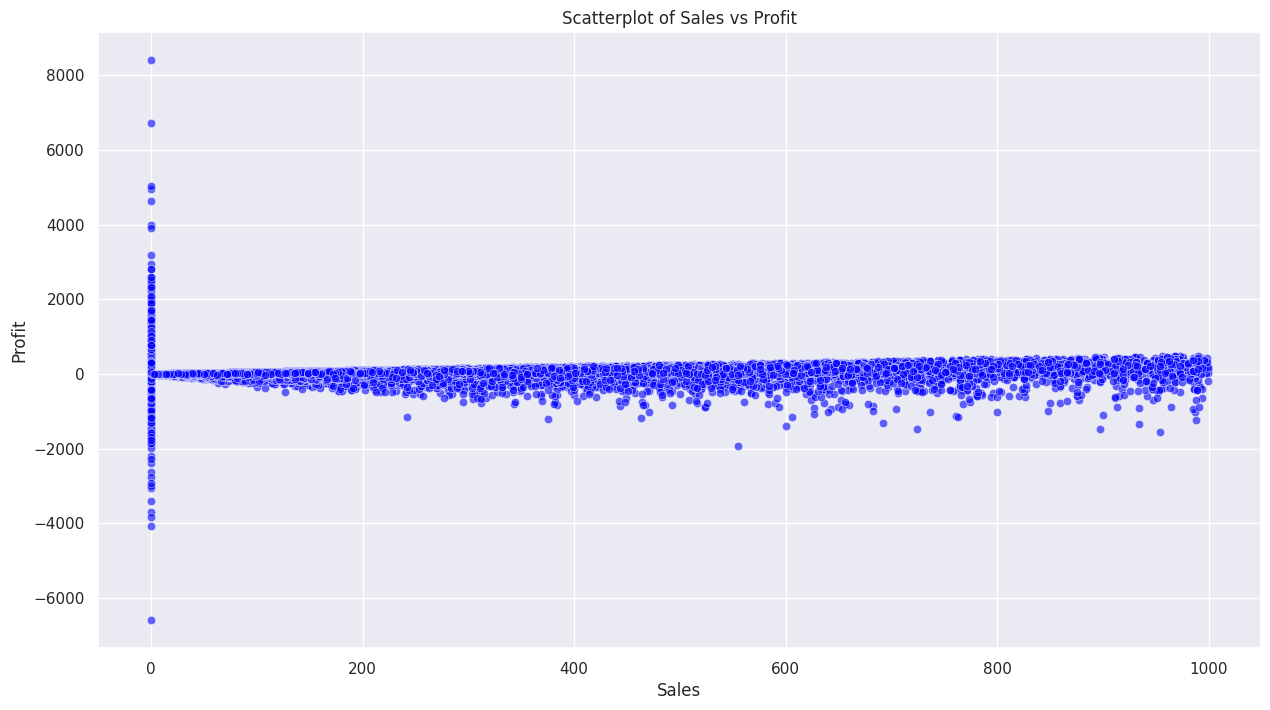

In [363]:
sns.scatterplot(x='sales', y='profit', data=df, color='blue', alpha=0.6)

plt.title('Scatterplot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

In the 2630 rows where 'sales' was missing, 'profit' contained extreme positive and negative outliers. I want to look into profit margins in my analysis so I will drop these rows since they throw off the calculation. They represent 5% of total rows.  

In [364]:

df = df.drop(df[df['sales'] == 0].index)

Does every row correspond to a unique order ID?

In [365]:
df['order_id'].value_counts()

,count
order_id,
MX-2014-166541,13
IN-2013-42311,13
IN-2012-41261,13
NI-2014-8880,13
TO-2014-9950,13
...,...
MX-2013-147767,1
ES-2013-1245292,1
ID-2013-60637,1


No. Some repeat up to 14 times. Will keep this in mind.

###Feature Engineering

In [366]:
#month column
df['order_month'] = df['order_date'].dt.month

#Naming the months
m={1:"January",2:"Fabruary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}

df['order_month']=[m[i] for i in df['order_month']]

In [367]:
#I originally thought sales corresponded to quantity of items sold.
#Originally I called this feature Profit Rate (a measure of profit per item sold)
#After investigation I found that sales corresponds to revenue. So this feature is profit margin. A much more useful feature
df['profit_margin'] = df['profit']/df['sales']

In [368]:
#days to ship aka lead time
df['lead_time'] = df['ship_date'] - df['order_date']
df['lead_time'] = df['lead_time'].dt.days

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,order_month,profit_margin,lead_time
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,408.0,2,0.0,106.140,35.46,Medium,2011,January,0.260147,151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,120.0,3,0.1,36.036,9.72,Medium,2011,January,0.300300,212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,66.0,4,0.0,29.640,8.17,High,2011,January,0.449091,120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,45.0,3,0.5,-26.055,4.82,High,2011,January,-0.579000,120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,114.0,5,0.1,37.770,4.70,Medium,2011,January,0.331316,212


#EDA

##Categories

Which is our most popular category?

<ipython-input-369-9e3a01c156c1>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-369-9e3a01c156c1>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




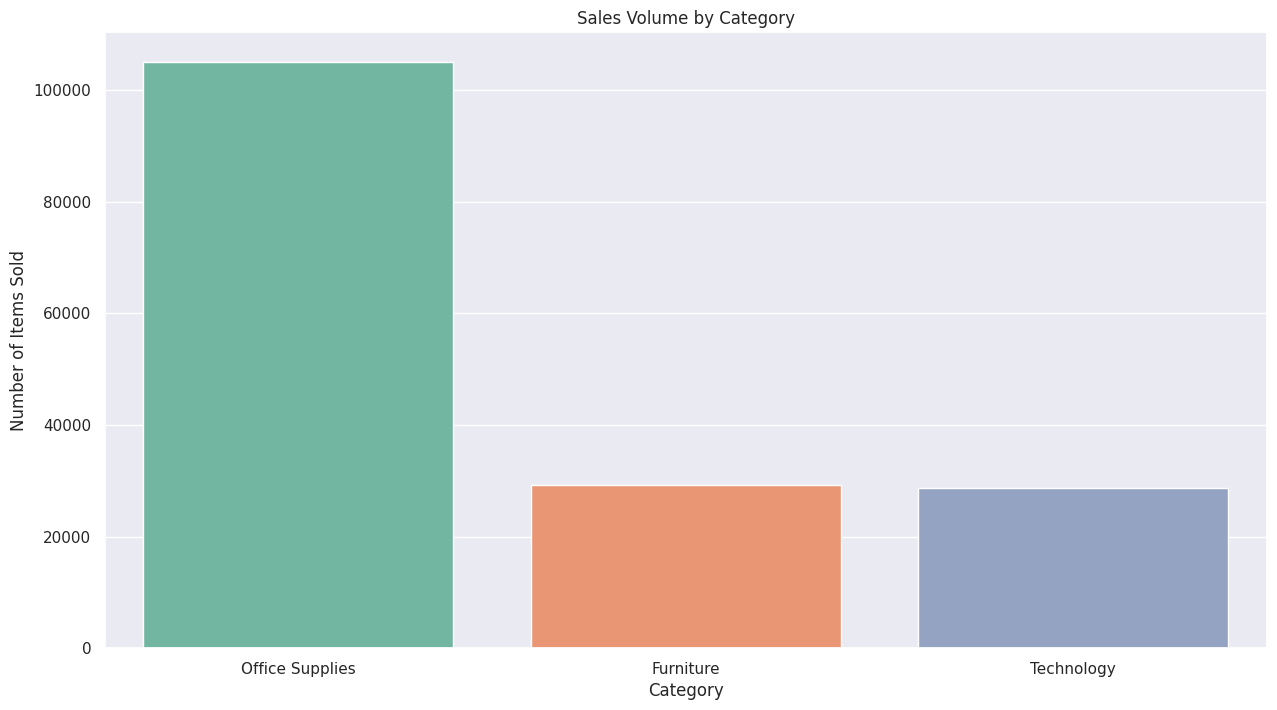

In [369]:
sns.barplot(x='category', y='quantity', data=df, estimator=sum, ci=None, palette='Set2')
plt.title('Sales Volume by Category')
plt.xlabel('Category')
plt.ylabel('Number of Items Sold')
plt.show()

Which is our top selling category?

<ipython-input-370-d011add89003>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-370-d011add89003>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




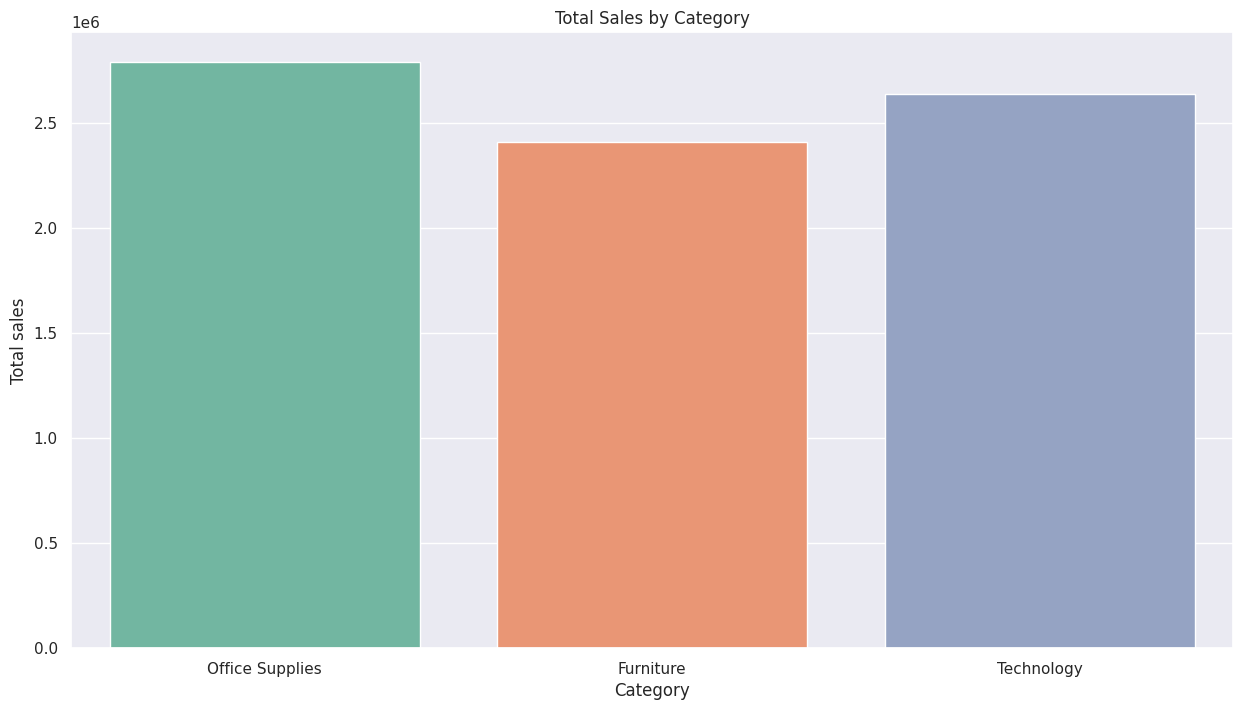

In [370]:
sns.barplot(x='category', y='sales', data=df, estimator=sum, ci=None, palette='Set2')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total sales')
plt.show()

Which is our most profitable category?

<ipython-input-371-28ad5124bf43>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-371-28ad5124bf43>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




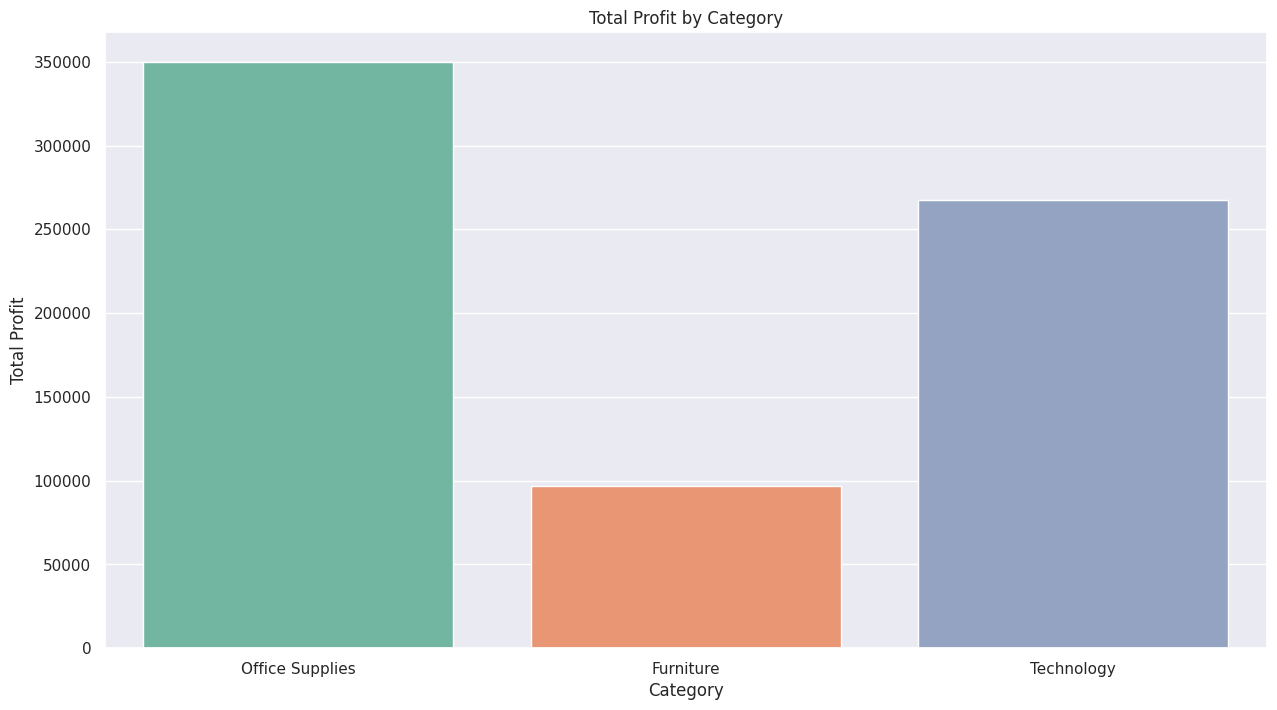

In [371]:
sns.barplot(x='category', y='profit', data=df, estimator=sum, ci=None, palette='Set2')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

<ipython-input-372-1ce392c78706>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-372-1ce392c78706>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




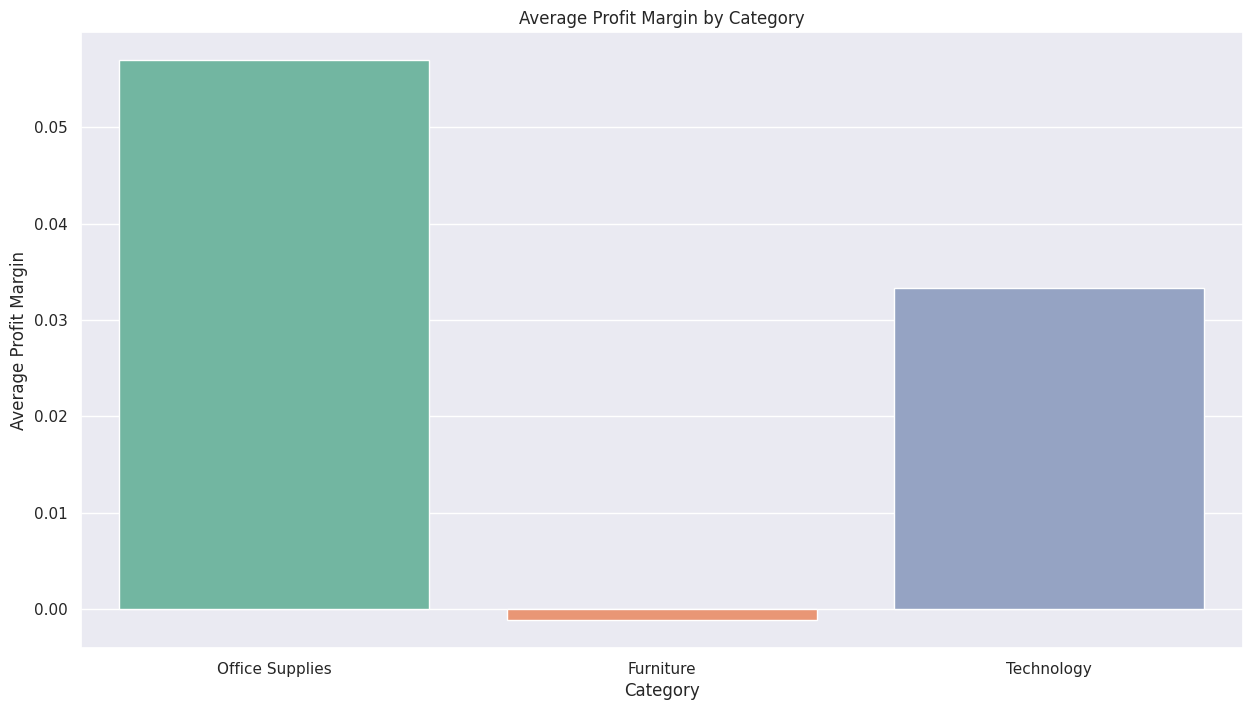

In [372]:
sns.barplot(x='category', y='profit_margin', data=df, ci=None, palette='Set2')
plt.title('Average Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit Margin')
plt.show()

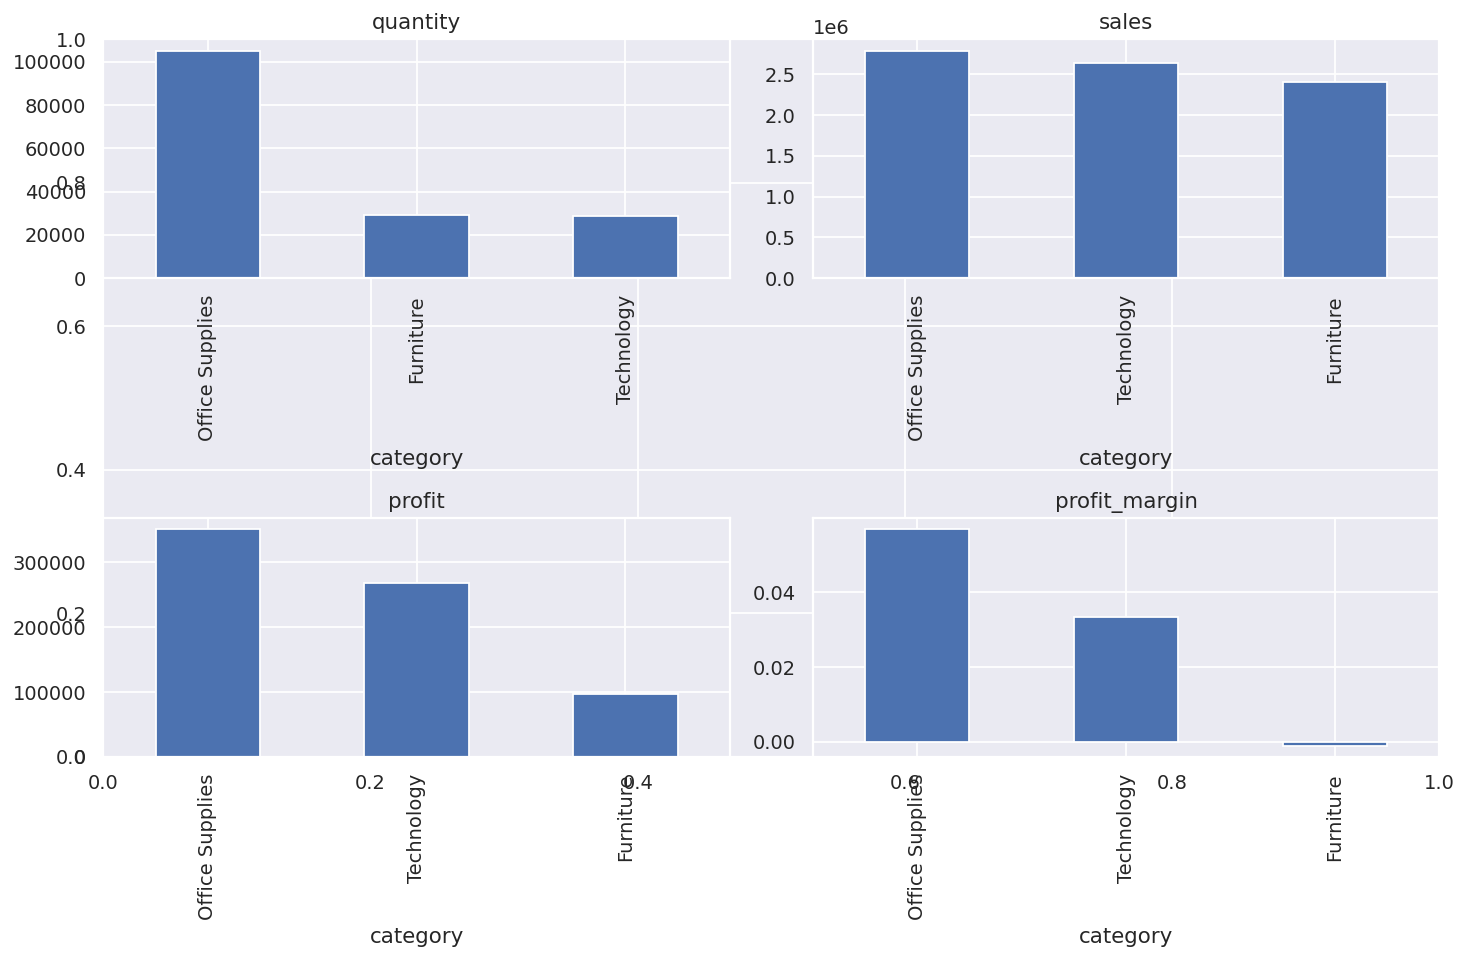

In [373]:
# I like this table of 4 plots but I have to make it look nicer. The axes overlap

df_category = df.groupby('category').agg({'sales': 'sum','profit': 'sum','quantity': 'sum', 'profit_margin': 'mean'})

fig, ax = plt.subplots(dpi=128, figsize=(12, 8))
for i, col in enumerate(['quantity', 'sales', 'profit', 'profit_margin'],1):
    plt.subplot(2,2,i)
    df_category[col].sort_values(ascending=False).plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()


The following conclusions and suggestions can be drawn from the above figure:

The sales volume of technology products is the lowest, but sales and profit are relatively high compared to sales volume. This may be because technology products tend to be more expensive and have relatively large profit margins. Based on this, the company should seek to increase their technology sales. This can be achieved through:


*   Promotion and discount programs
*   Product Innovation
*   Targeted Marketing
*   Additional sales channels (i.e online sales)


Furniture products have poor profits and even poorer profit margins so the company should focus on cost control, such as optimizing procurement costs, production costs, and shipping costs, to improve their profit margins. In addition, offering furniture products that are up to date with current fashion trends should be heavily considered to attract more consumers to purchase furniture products.

##Subcategories

Which is our biggest subcategory?

<ipython-input-374-e02ba8422fd7>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-374-e02ba8422fd7>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




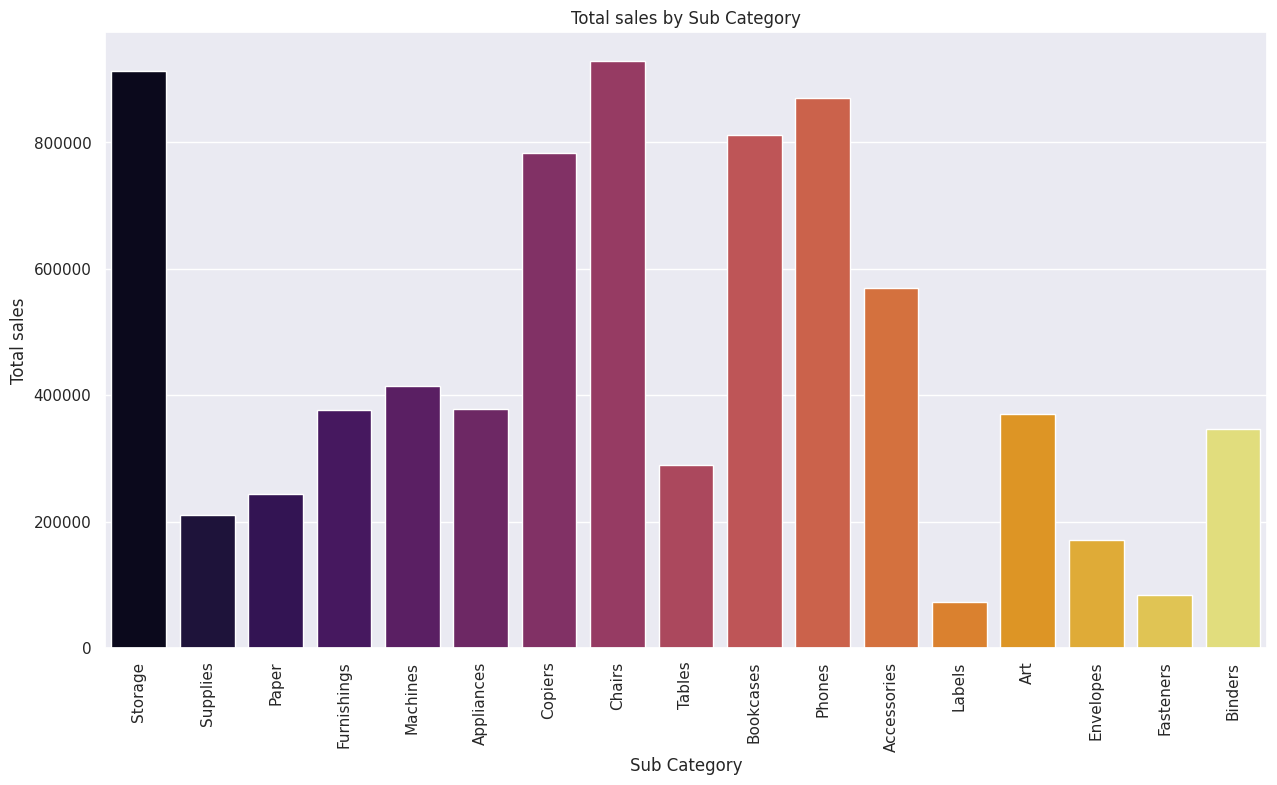

In [374]:
sns.barplot(x='sub_category', y='sales', data=df, estimator=sum, ci=None, palette='inferno')
plt.title('Total sales by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='center')
plt.show()

Which is our most profitable subcategory?

<ipython-input-375-3ee88e43d0b7>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




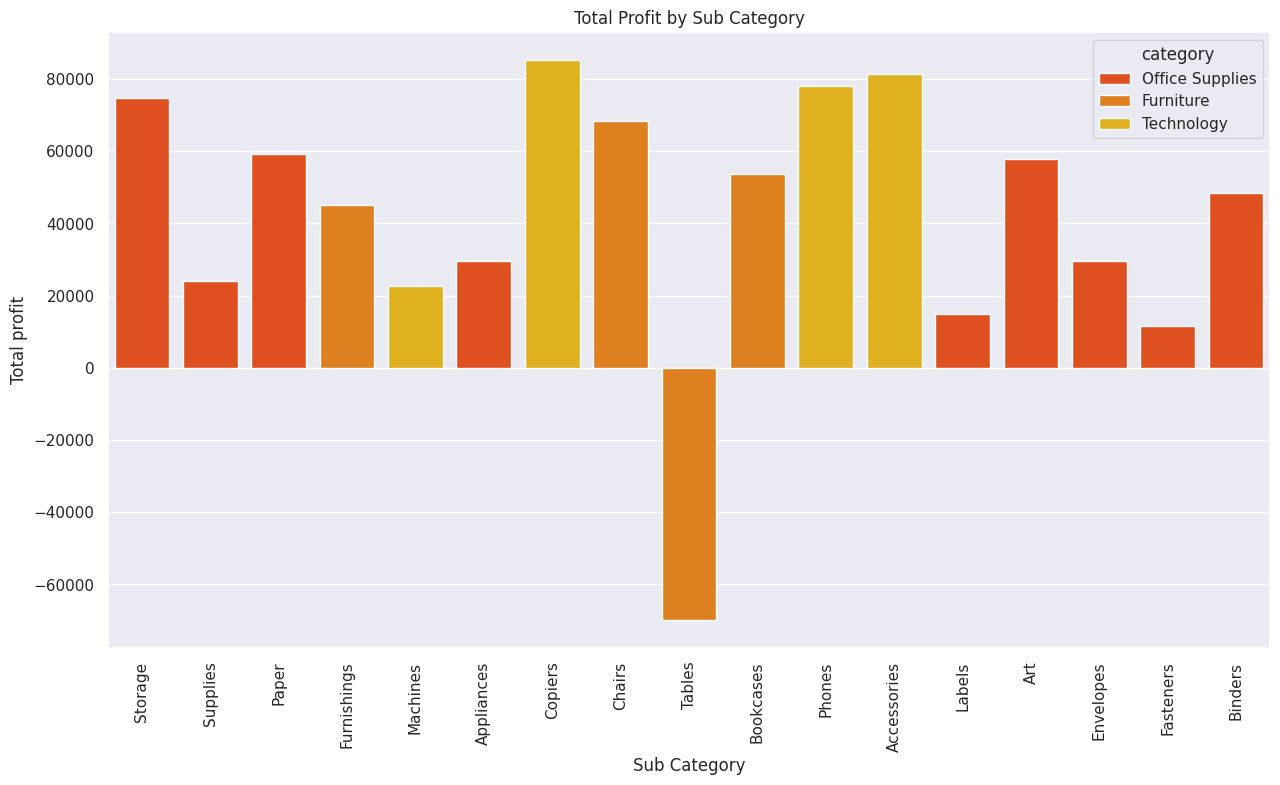

In [375]:
#remove hue?
sns.barplot(x='sub_category', y='profit', data=df, hue='category', estimator=sum, ci=None, palette='autumn')
plt.title('Total Profit by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')
plt.show()

Most profitable subcategories are copiers, phones, and bookcases. Least profitable are fasteners, labels, and supplies. Most notably, tables has negative profit.

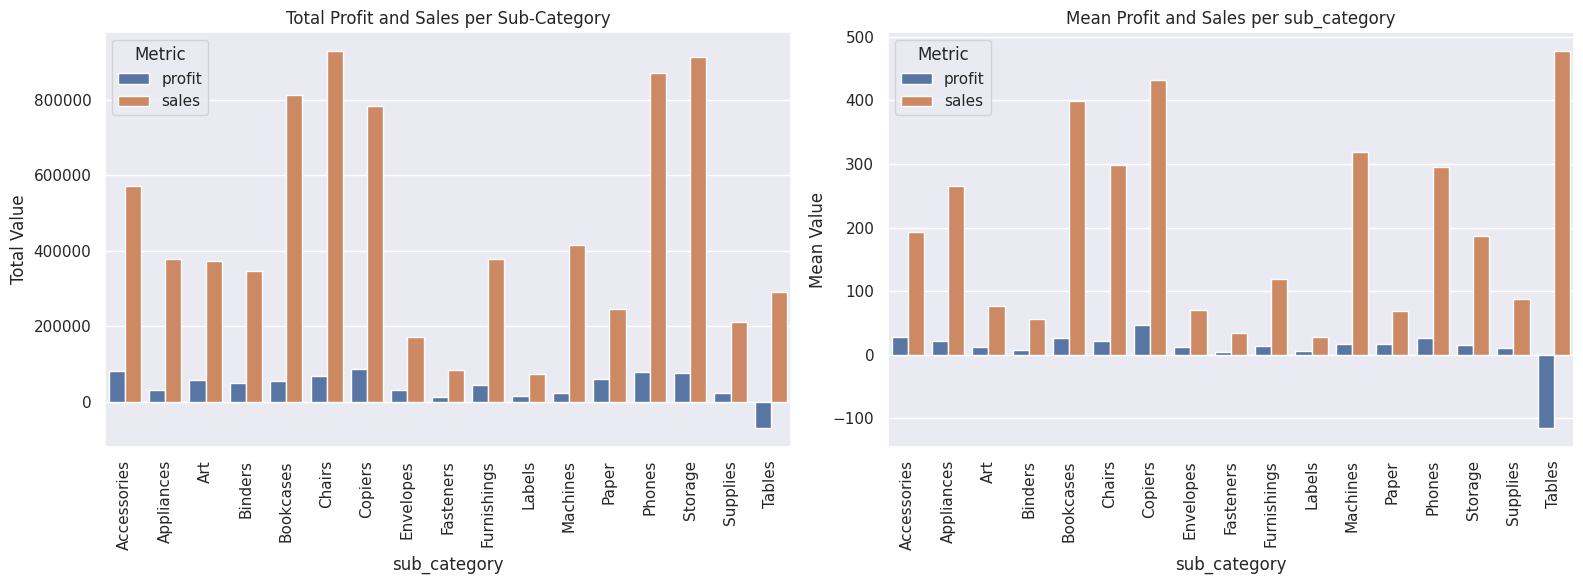

In [376]:
grouped_sum = df.groupby('sub_category')[['profit', 'sales']].sum().reset_index()
grouped_mean = df.groupby('sub_category')[['profit', 'sales']].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=grouped_sum.melt(id_vars='sub_category', var_name='Metric', value_name='Value'), x='sub_category', y='Value', hue='Metric', ax=axes[0])
axes[0].set_title('Total Profit and Sales per Sub-Category')
axes[0].set_ylabel('Total Value')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(data=grouped_mean.melt(id_vars='sub_category', var_name='Metric', value_name='Value'), x='sub_category', y='Value', hue='Metric', ax=axes[1])
axes[1].set_title('Mean Profit and Sales per sub_category')
axes[1].set_ylabel('Mean Value')
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Here is a better visualization of subcategories

In [377]:

fig = px.sunburst(df,path=['category','sub_category'],
values='sales',color='category',                 hover_data =['sales','quantity','profit'])
fig.update_layout(height=800,title_text='Sales of Product Categories & Sub-Categories')
fig.show()

Are some subcategories discounted more than others?

In [378]:
df['discount'].value_counts()

,count
discount,
0.000,27556
0.200,4757
0.100,3692
0.400,3098
0.600,1988
0.700,1770
0.500,1589
0.470,711
0.170,673


Some items are heavily discounted

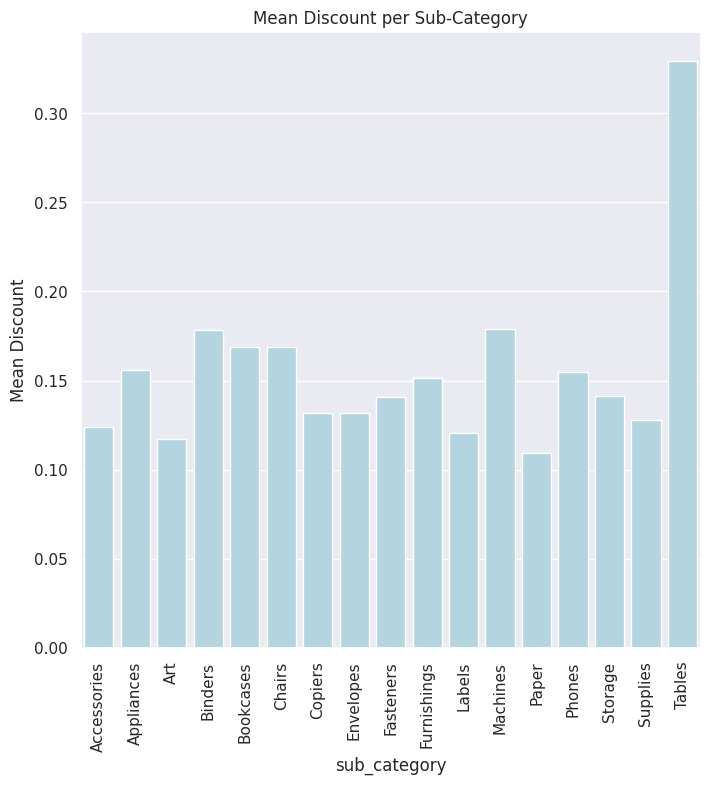

In [379]:
grouped_discount_mean = df.groupby('sub_category')['discount'].mean().reset_index()
fig, axes = plt.subplots(figsize=(8, 8))
sns.barplot(data=grouped_discount_mean, x='sub_category', y='discount', ax=axes, color='lightblue')
axes.set_title('Mean Discount per Sub-Category')
axes.set_ylabel('Mean Discount')
axes.tick_params(axis='x', rotation=90)

The store's discount system has a problem

-Best-selling products can be sold with no discount or with a partial discount

-Products that are causing damage to the store should be sold without discount

-Products with limited sales and higher profitability should be sold at a higher discount to attract customers

<ipython-input-380-2b996870c762>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-380-2b996870c762>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




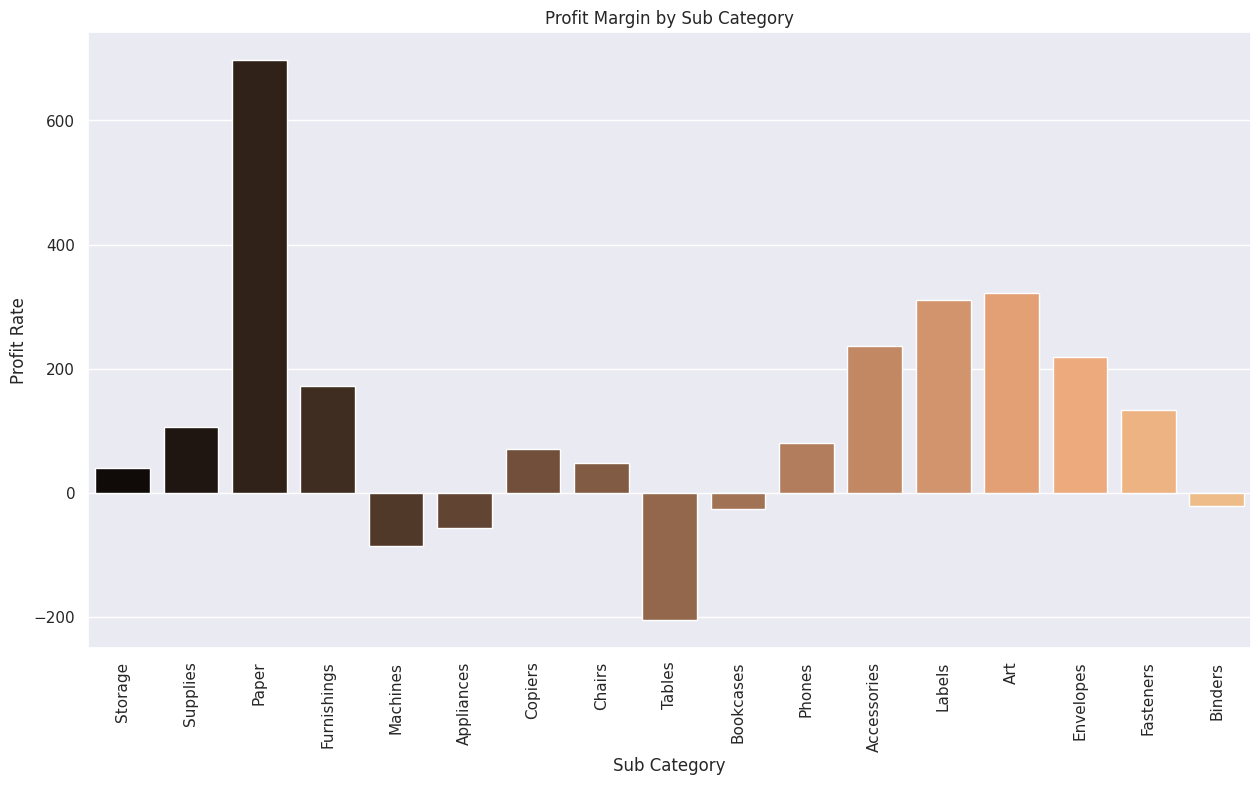

In [380]:
sns.barplot(x='sub_category', y='profit_margin', data=df, estimator=sum, ci=None, palette='copper')
plt.title('Profit Margin by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Profit Rate')
plt.xticks(rotation=90, ha='center')
plt.show()

##Products

What are our top 20 most popular products?

<ipython-input-381-cf6a02021c67>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-381-cf6a02021c67>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




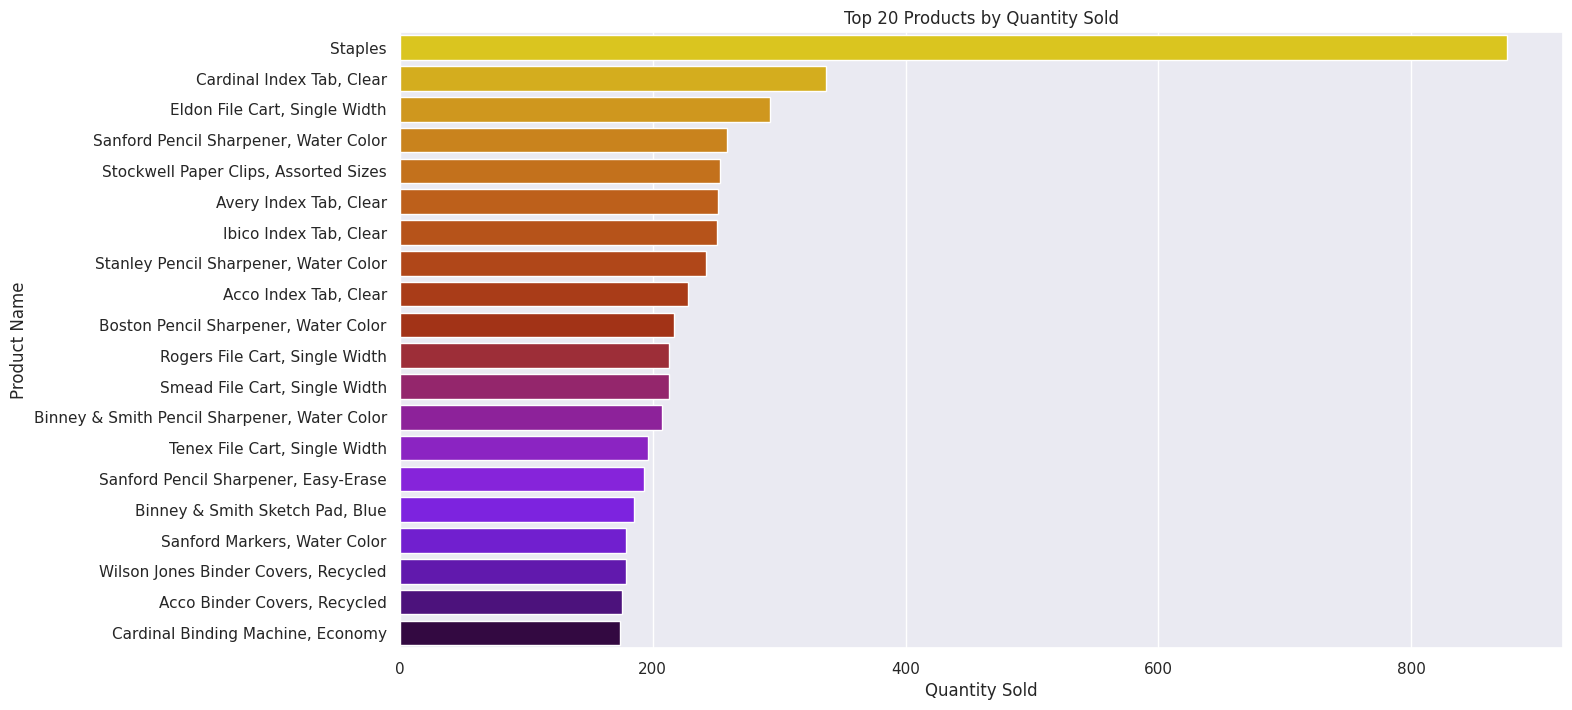

In [381]:
top_profit_quantities = df.groupby('product_name')['quantity'].sum().nlargest(20).reset_index()

sns.barplot(
    y='product_name',
    x='quantity',
    data=top_profit_quantities,
    ci=None,
    palette='gnuplot_r'
)


plt.title('Top 20 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

What are our 20 least popular products?

<ipython-input-382-3e10fe15b4c7>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-382-3e10fe15b4c7>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




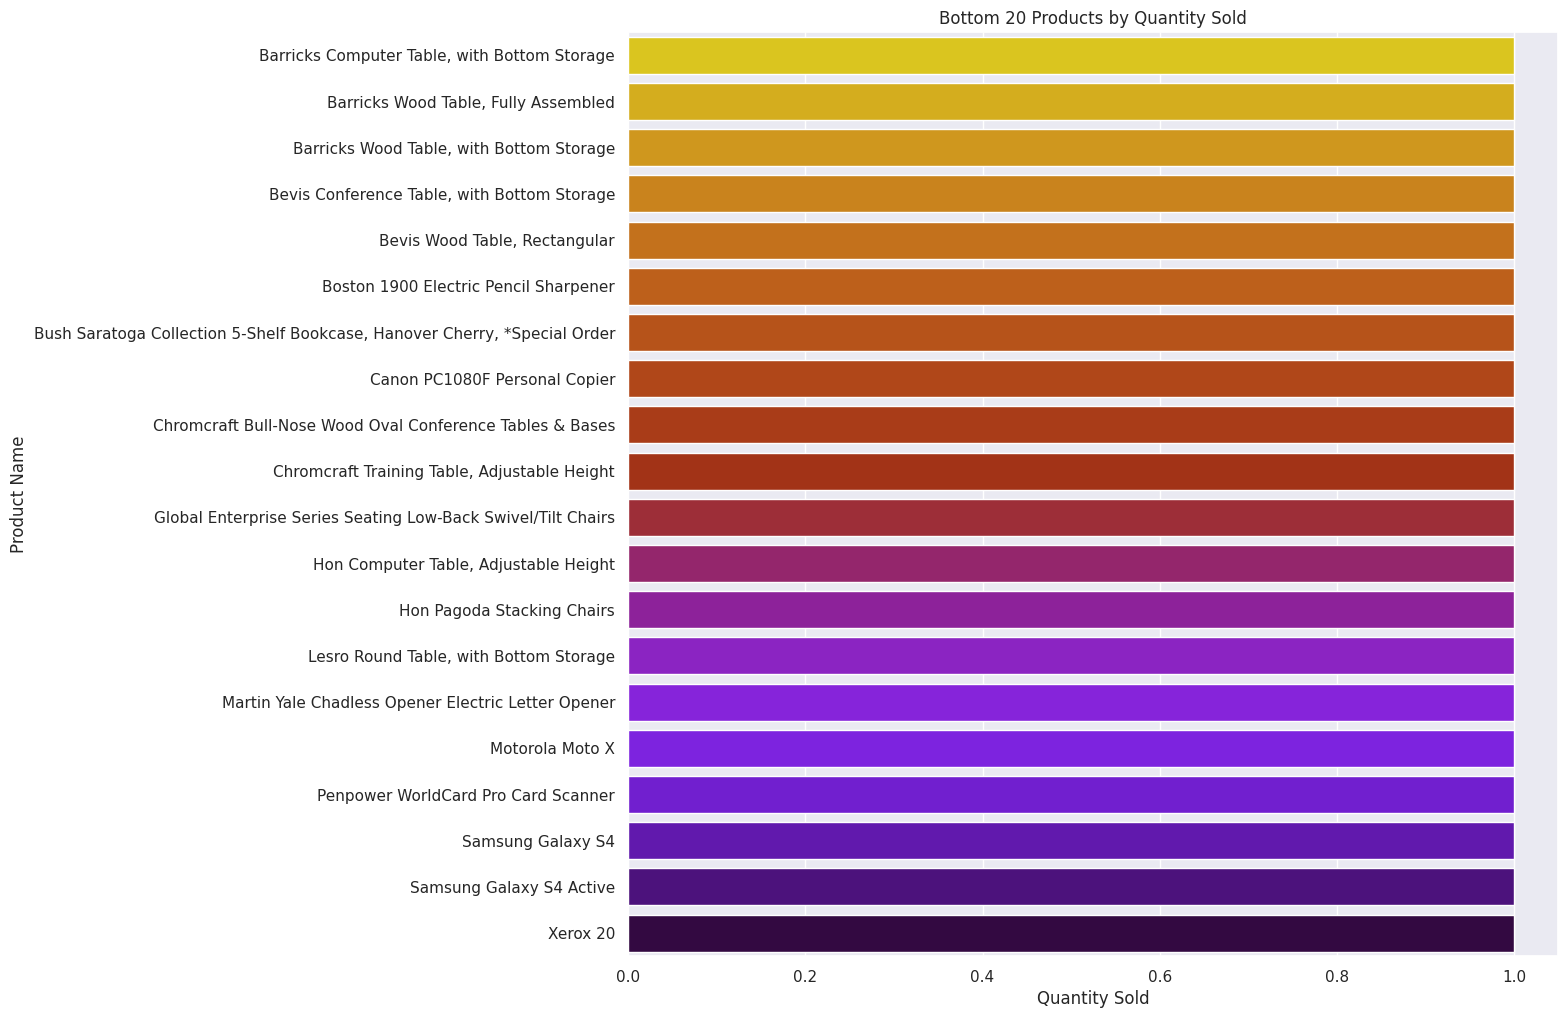

In [382]:
bottom_profit_quantities = df.groupby('product_name')['quantity'].sum().nsmallest(20).reset_index()


plt.figure(figsize=(12, 12))
sns.barplot(
    y='product_name',
    x='quantity',
    data=bottom_profit_quantities,
    ci=None,
    palette='gnuplot_r'
)

plt.title('Bottom 20 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

Bottom 20 products were all purchased once. Lets look at more products.

<ipython-input-383-191328740e38>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-383-191328740e38>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




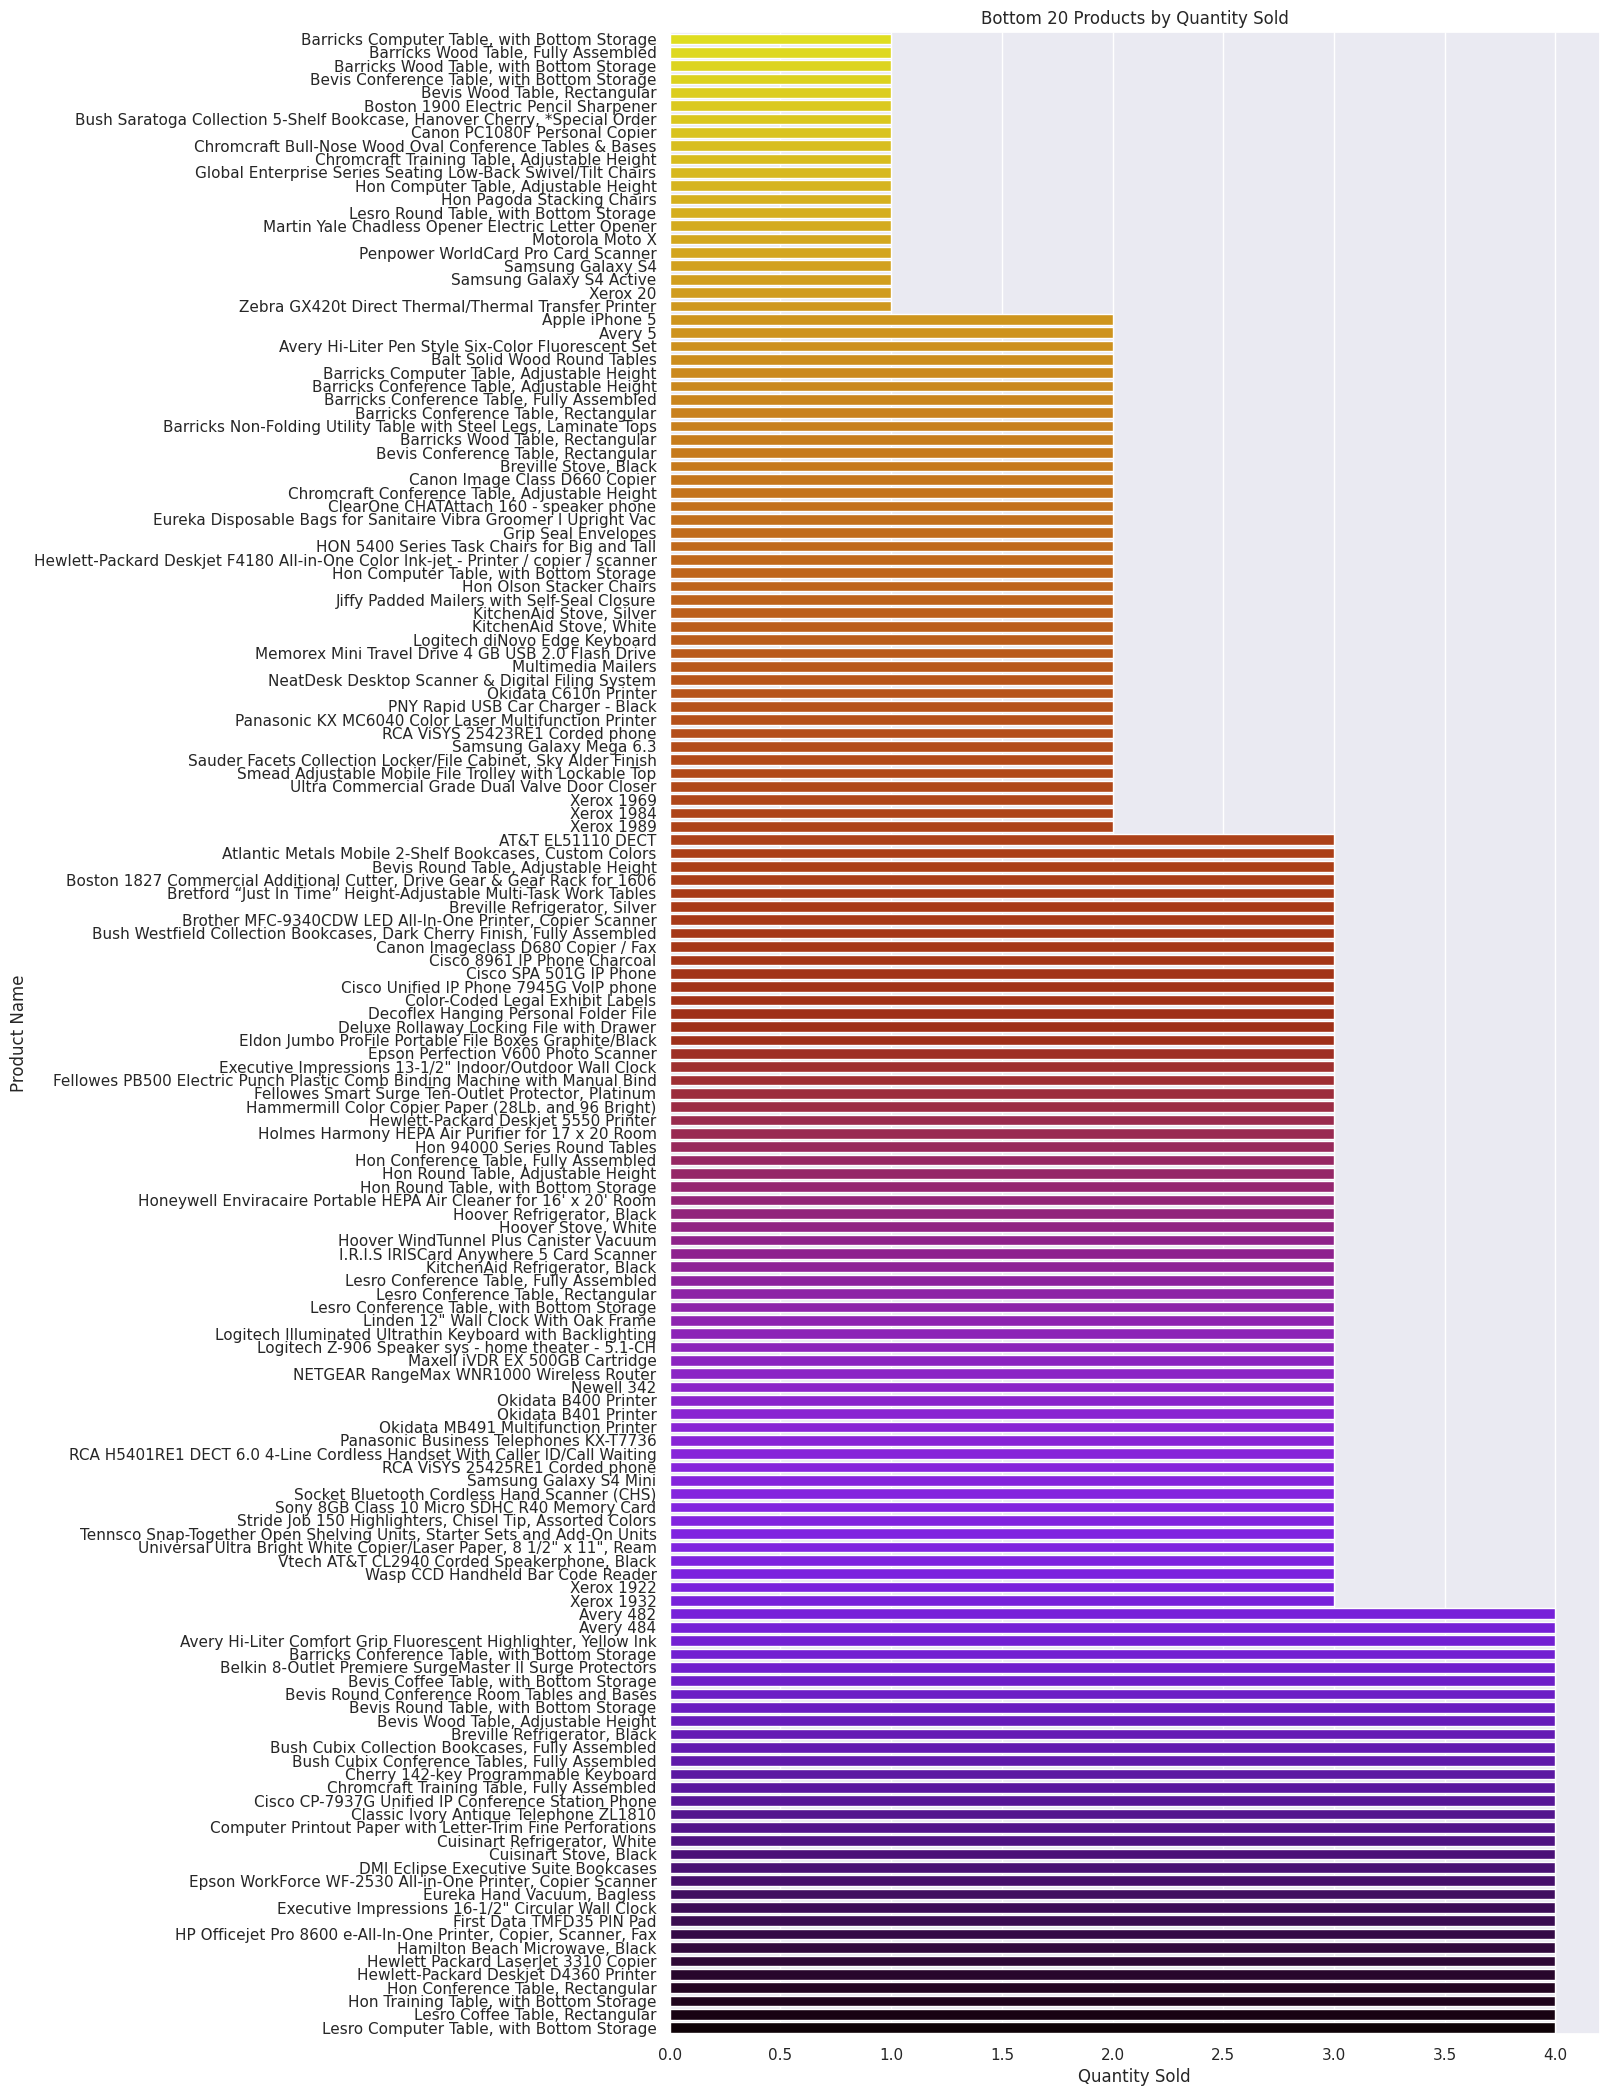

In [383]:
bottom_profit_quantities = df.groupby('product_name')['quantity'].sum().nsmallest(150).reset_index()


plt.figure(figsize=(12, 26))
sns.barplot(
    y='product_name',
    x='quantity',
    data=bottom_profit_quantities,
    ci=None,
    palette='gnuplot_r'
)

plt.title('Bottom 20 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

The company's inventory needs some serious streamlining. A large number of items were only sold a few times over the course of 4 years (January 2011 to December 2014). The company should stop selling these items. To keep these items stored...................................................

What are the top products by profit ratio?

<ipython-input-384-e814c01c6802>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-384-e814c01c6802>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




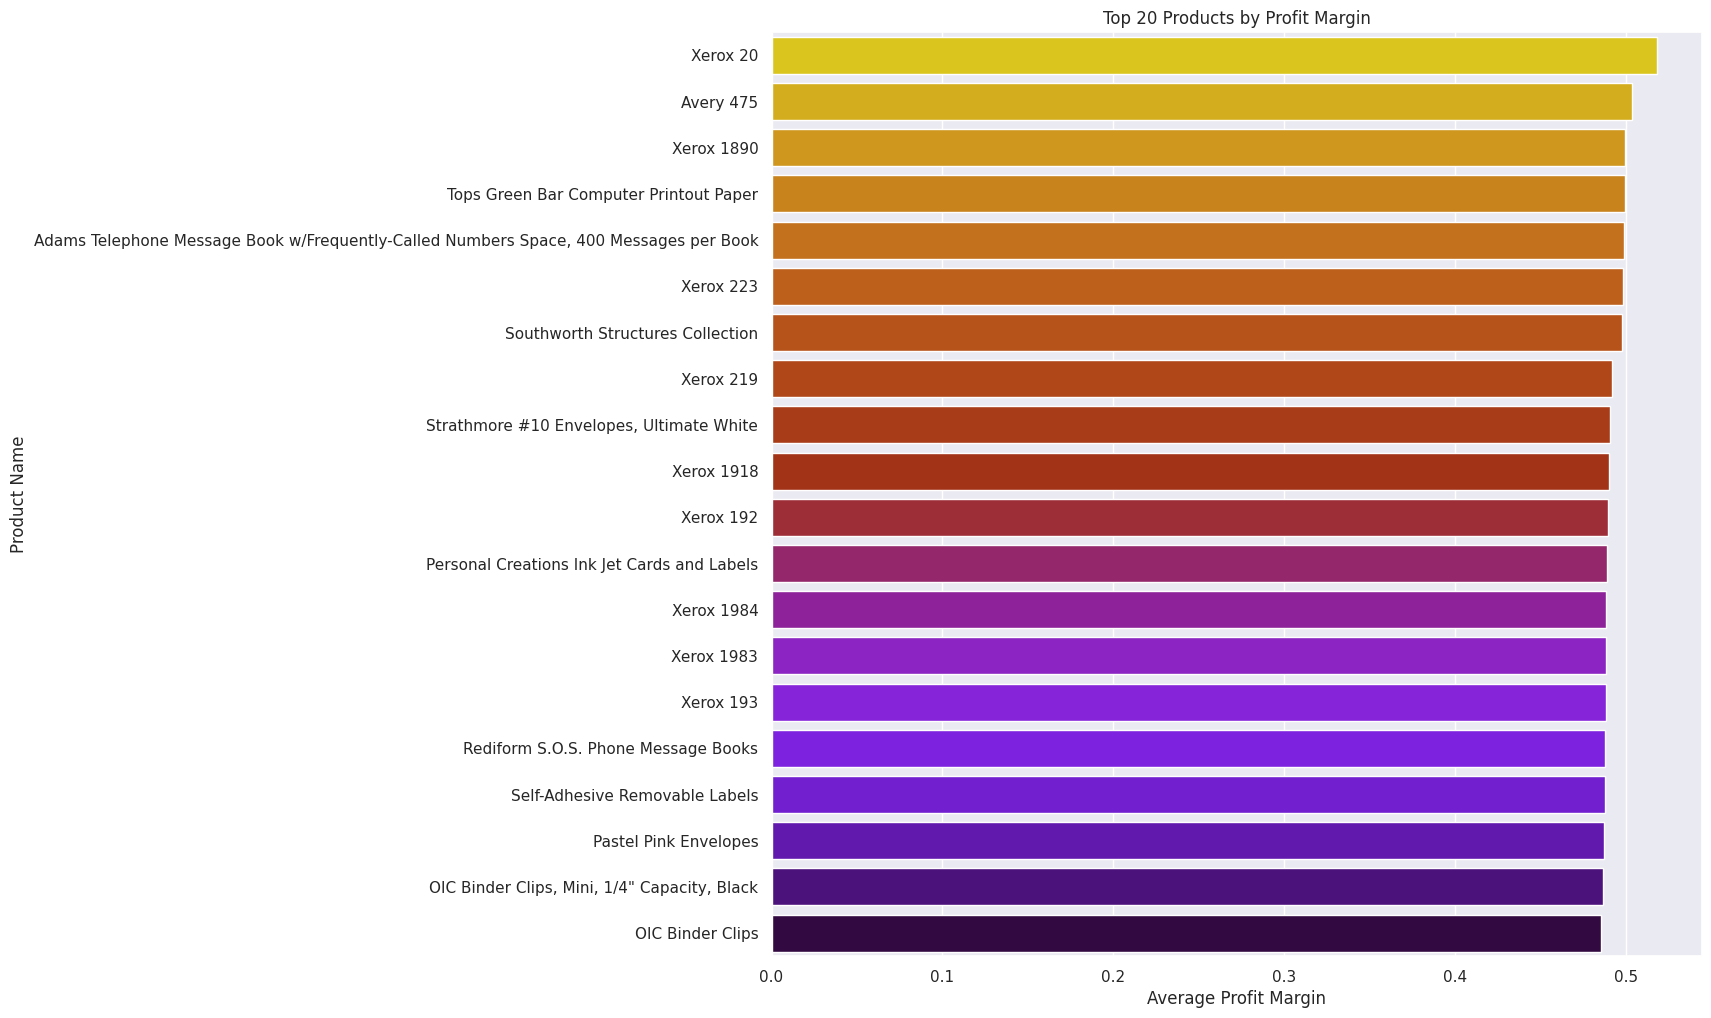

In [384]:
product_profit_margins = df.groupby('product_name')['profit_margin'].mean().nlargest(20).reset_index()


plt.figure(figsize=(12, 12))
sns.barplot(
    y='product_name',
    x='profit_margin',
    data=product_profit_margins,
    ci=None,
    palette='gnuplot_r'
)

plt.title('Top 20 Products by Profit Margin')
plt.xlabel('Average Profit Margin')
plt.ylabel('Product Name')
plt.show()

What subcategories do the above products belong to?

<ipython-input-385-5dbeec232d41>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




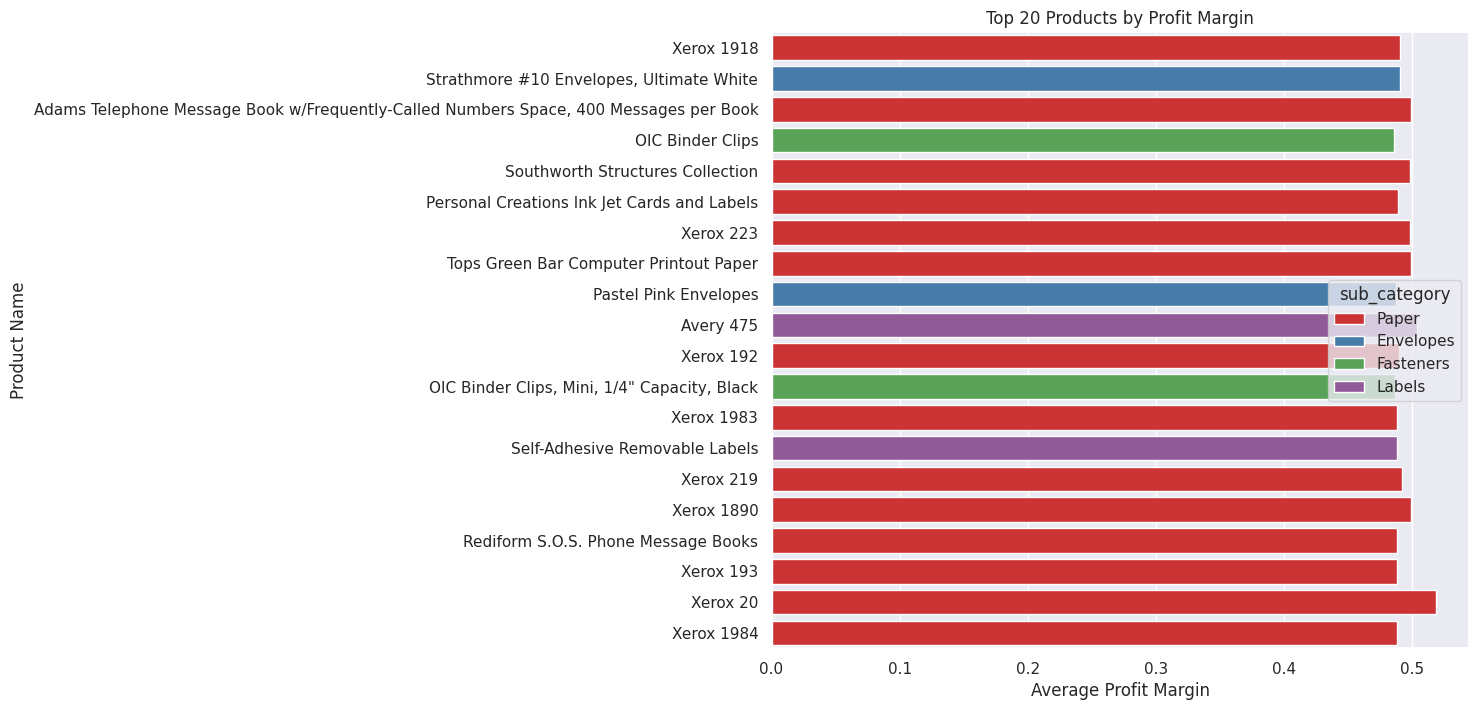

In [385]:
top_profit_margin = (
    df.groupby('product_name')['profit_margin']
    .mean()
    .nlargest(20)
    .reset_index()
)

# Merge back with the original data to retain 'sub_category' for hue
top_products = df[df['product_name'].isin(top_profit_margin['product_name'])]

plt.figure(figsize=(9, 8))
sns.barplot(
    y='product_name',
    x='profit_margin',
    data=top_products,
    hue='sub_category',
    ci=None,
    palette='Set1'
)

plt.title('Top 20 Products by Profit Margin')
plt.xlabel('Average Profit Margin')
plt.ylabel('Product Name')
plt.show()

Most of the most profitable products sold are Xerox machines.

#Markets

Sales/profit/profit margin per market?

<ipython-input-386-888b2da2a84e>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-386-888b2da2a84e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




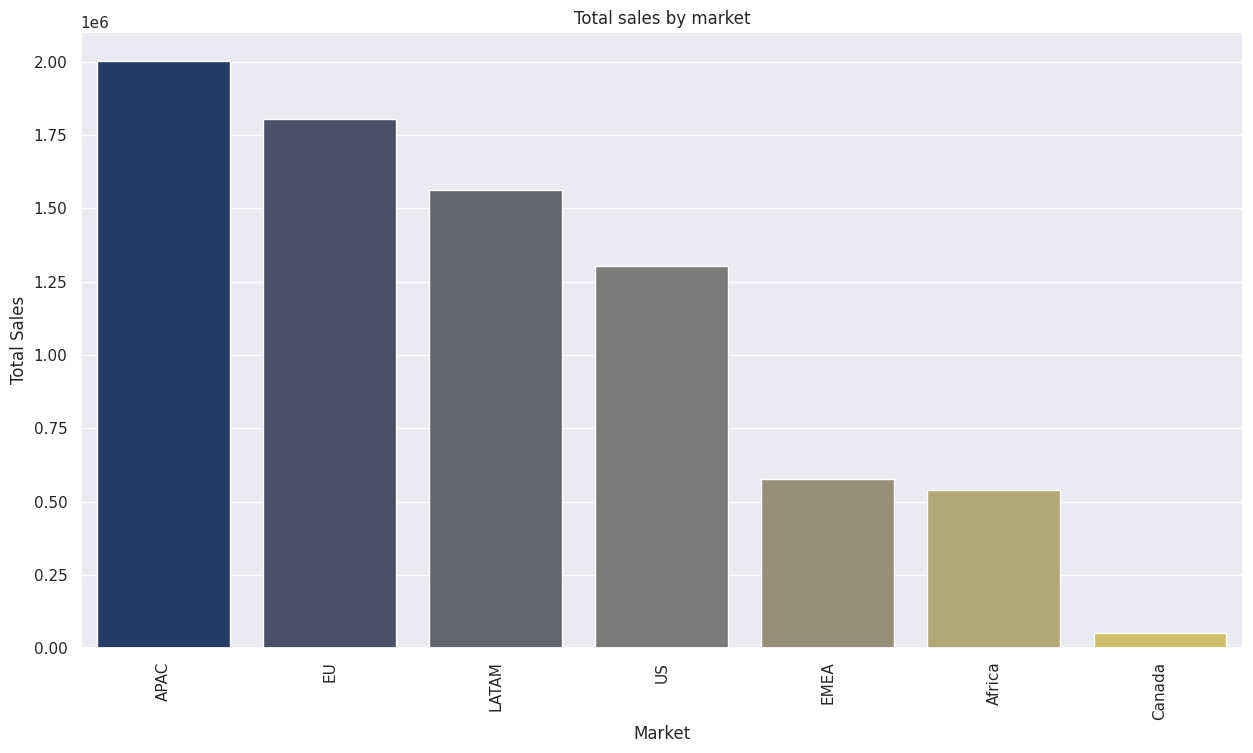

In [386]:
ranked_market_sales = df.groupby('market')['sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='market', y='sales', data=ranked_market_sales, estimator=sum, ci=None, palette='cividis', order=ranked_market_sales['market'])


plt.title('Total sales by market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

<ipython-input-387-385b352254f7>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-387-385b352254f7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




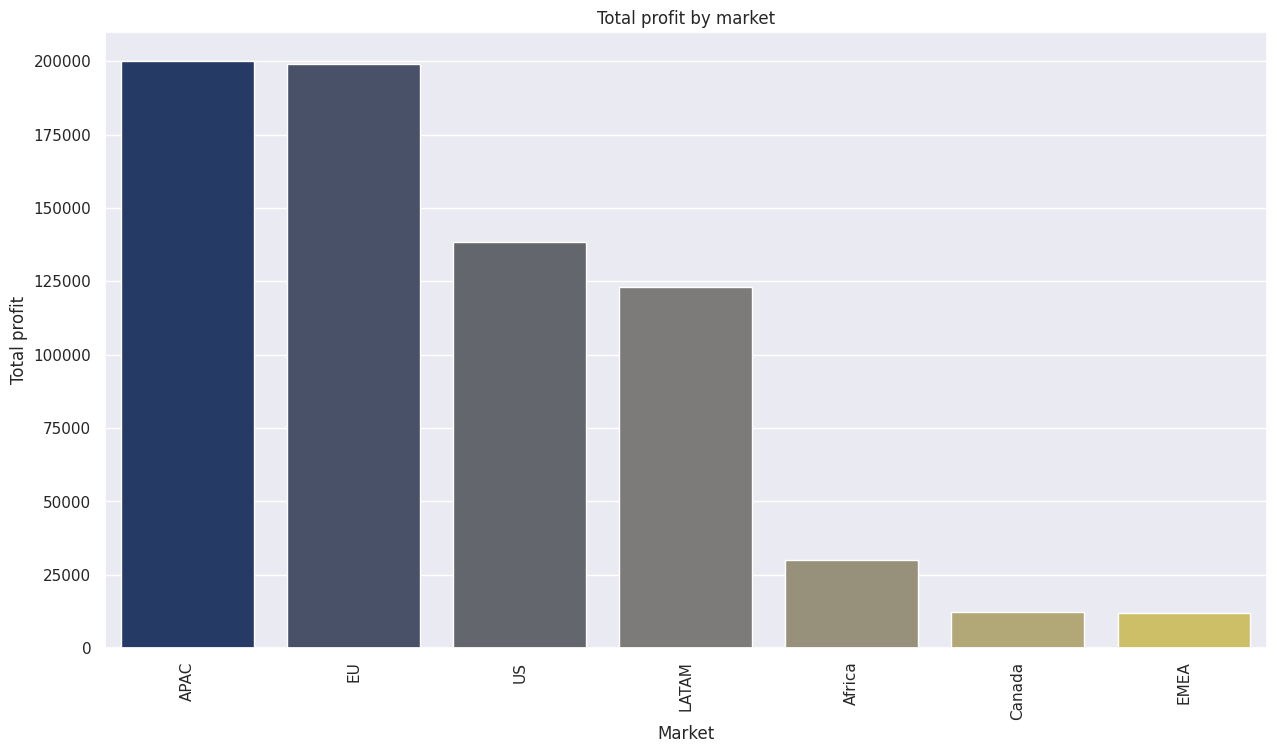

In [387]:
ranked_market_profit = df.groupby('market')['profit'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='market', y='profit', data=ranked_market_profit, estimator=sum, ci=None, palette='cividis', order=ranked_market_profit['market'])


plt.title('Total profit by market')
plt.xlabel('Market')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')
plt.show()

<ipython-input-388-93ac9255dce2>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-388-93ac9255dce2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




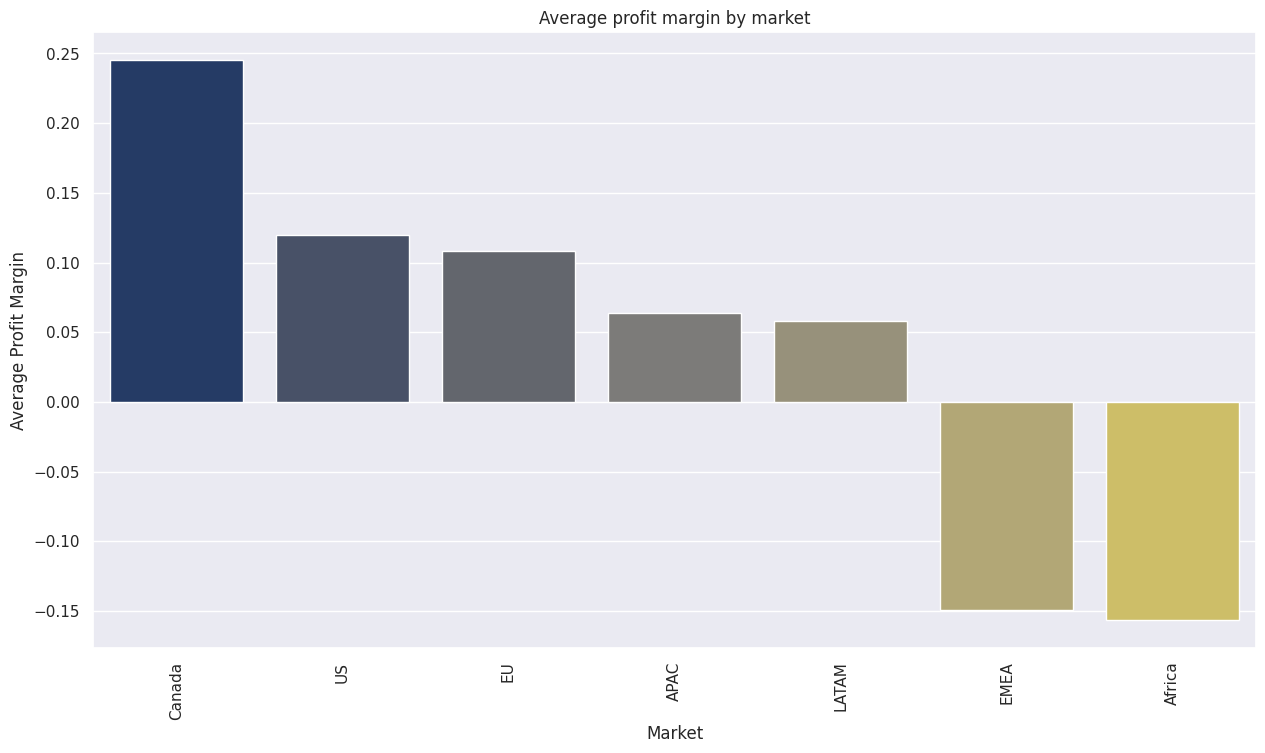

In [388]:
ranked_market_margin = df.groupby('market')['profit_margin'].mean().sort_values(ascending=False).reset_index()

sns.barplot(
    x='market',
    y='profit_margin',
    data=ranked_market_margin,
    ci=None,
    palette='cividis',
    order=ranked_market_margin['market']
)

plt.title('Average profit margin by market')
plt.xlabel('Market')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=90, ha='center')
plt.show()

Canada. Despite being the smallest market, has the highest average profit margin.

This may be due to factors such as consumption habits, economic development level, and competition in different regions. Canada may have more high-end consumers, while other markets may have more discount promotions, resulting in lower unit prices. Additionally, competition in different regions may vary wildly, which can also affect sales and profit margins.

EMEA and Africa have a negative average profit margin but are still profitable (as we see above). Lets explore a little further.


Text(0, 0.5, 'Profit')

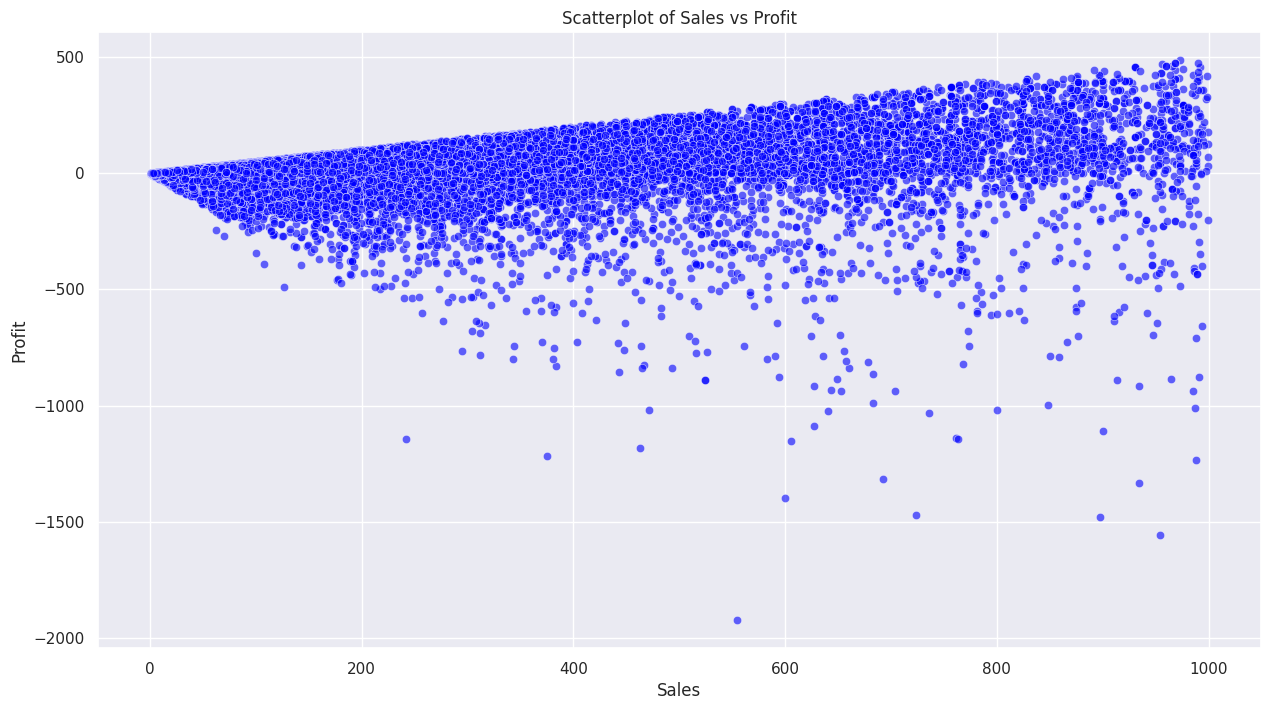

In [389]:
sns.scatterplot(x='sales', y='profit', data=df, color='blue', alpha=0.6)

plt.title('Scatterplot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

It is possible that a disproportionate amount of those outliers with extreme negative profits are in the Africa and EMEA markets, throwing off the calculation for their average profit margin. Especially since they are the smallest market along with Canada.

##Region

What is our biggest region?

<ipython-input-390-57c28afffa7e>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-390-57c28afffa7e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




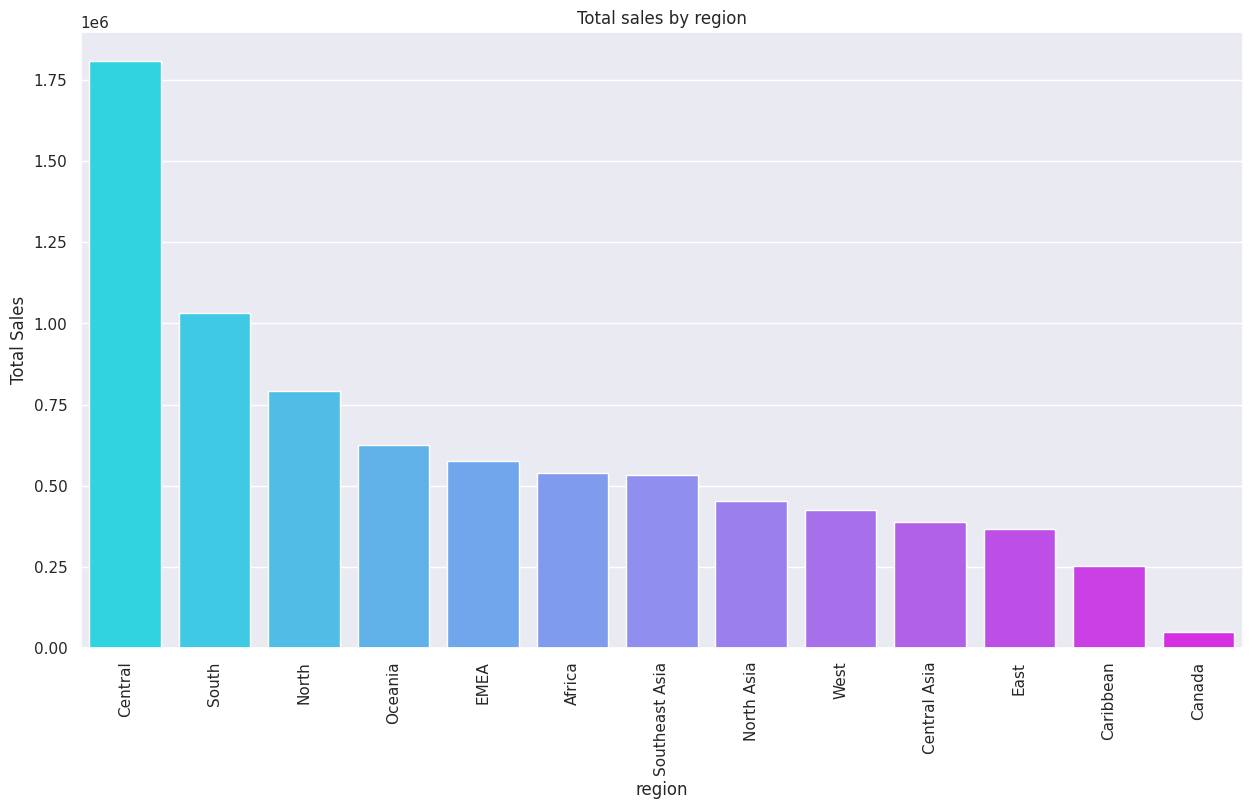

In [390]:
ranked_region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='region', y='sales', data=ranked_region_sales, estimator=sum, ci=None, palette='cool', order=ranked_region_sales['region'])


plt.title('Total sales by region')
plt.xlabel('region')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

What is our most profitable region?

<ipython-input-391-0d08ec64722b>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-391-0d08ec64722b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




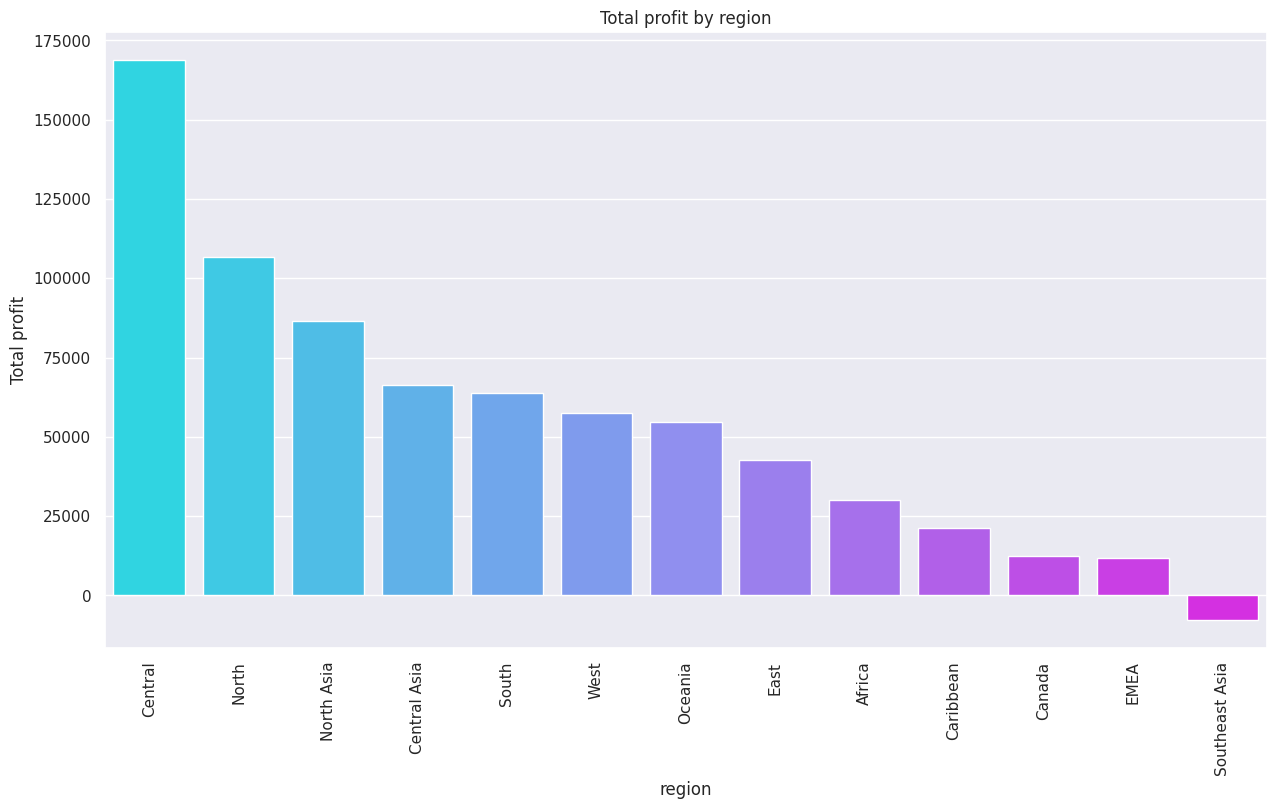

In [391]:
ranked_region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x='region', y='profit', data=ranked_region_profit, estimator=sum, ci=None, palette='cool', order=ranked_region_profit['region'])


plt.title('Total profit by region')
plt.xlabel('region')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')
plt.show()

Southeast asia is the median in market sizes but brings negative profit.

Central, South, East, West, and North are some of the biggest regions. Do these correspond to regions in the US?

In [392]:
df[df['region']=='North'].head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,order_month,profit_margin,lead_time
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,45.0,3,0.500,-26.05500,4.82,High,2011,January,-0.579000,120
12,ES-2011-4869686,2011-03-01,2011-07-01,Standard Class,Dorothy Dickinson,Consumer,England,United Kingdom,EU,North,...,854.0,7,0.000,290.43000,12.56,Medium,2011,March,0.340082,122
28,MX-2011-140641,2011-04-01,2011-09-01,Standard Class,Maya Herman,Corporate,Yucatán,Mexico,LATAM,North,...,223.0,4,0.000,13.28000,42.28,High,2011,April,0.059552,153
32,MX-2011-140641,2011-04-01,2011-09-01,Standard Class,Maya Herman,Corporate,Yucatán,Mexico,LATAM,North,...,166.0,2,0.002,49.42824,9.54,High,2011,April,0.297760,153
37,IT-2011-2942451,2011-04-01,2011-09-01,Standard Class,Grant Thornton,Corporate,England,United Kingdom,EU,North,...,27.0,2,0.500,-21.90000,2.11,Medium,2011,April,-0.811111,153
40,IT-2011-2942451,2011-04-01,2011-09-01,Standard Class,Grant Thornton,Corporate,England,United Kingdom,EU,North,...,17.0,2,0.500,-1.05000,0.90,Medium,2011,April,-0.061765,153
110,IT-2011-3659171,2011-10-01,2011-01-14,Standard Class,Greg Guthrie,Corporate,England,United Kingdom,EU,North,...,206.0,3,0.500,-41.26500,14.65,Medium,2011,October,-0.200316,-260
112,MX-2011-140697,2011-10-01,2011-01-15,Standard Class,Paul MacIntyre,Consumer,México,Mexico,LATAM,North,...,114.0,3,0.000,56.88000,8.93,Medium,2011,October,0.498947,-259
123,MX-2011-140697,2011-10-01,2011-01-15,Standard Class,Paul MacIntyre,Consumer,México,Mexico,LATAM,North,...,16.0,1,0.000,1.76000,0.89,Medium,2011,October,0.110000,-259
127,US-2011-163874,2011-11-01,2011-12-01,First Class,Philip Fox,Consumer,México,Mexico,LATAM,North,...,452.0,5,0.200,-107.30000,57.75,Medium,2011,November,-0.237389,30


Looks like region corresponds to regions within markets. Not regions within countries since Stockholm is not in the northern region of sweden but sweden is in the northern region of the EU. Likewise Yucatan is not in the north of mexico but mexico is in the north of latin america (LATAM). I do not think the region feature is very useful.

In [393]:
#Experimented with ways of plotting.

#sns.set(rc={'figure.figsize':(15, 8)})
#sns.countplot(x=df['region'])


##Countries

Lets look into countries

<ipython-input-394-9dc1087beea5>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-394-9dc1087beea5>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




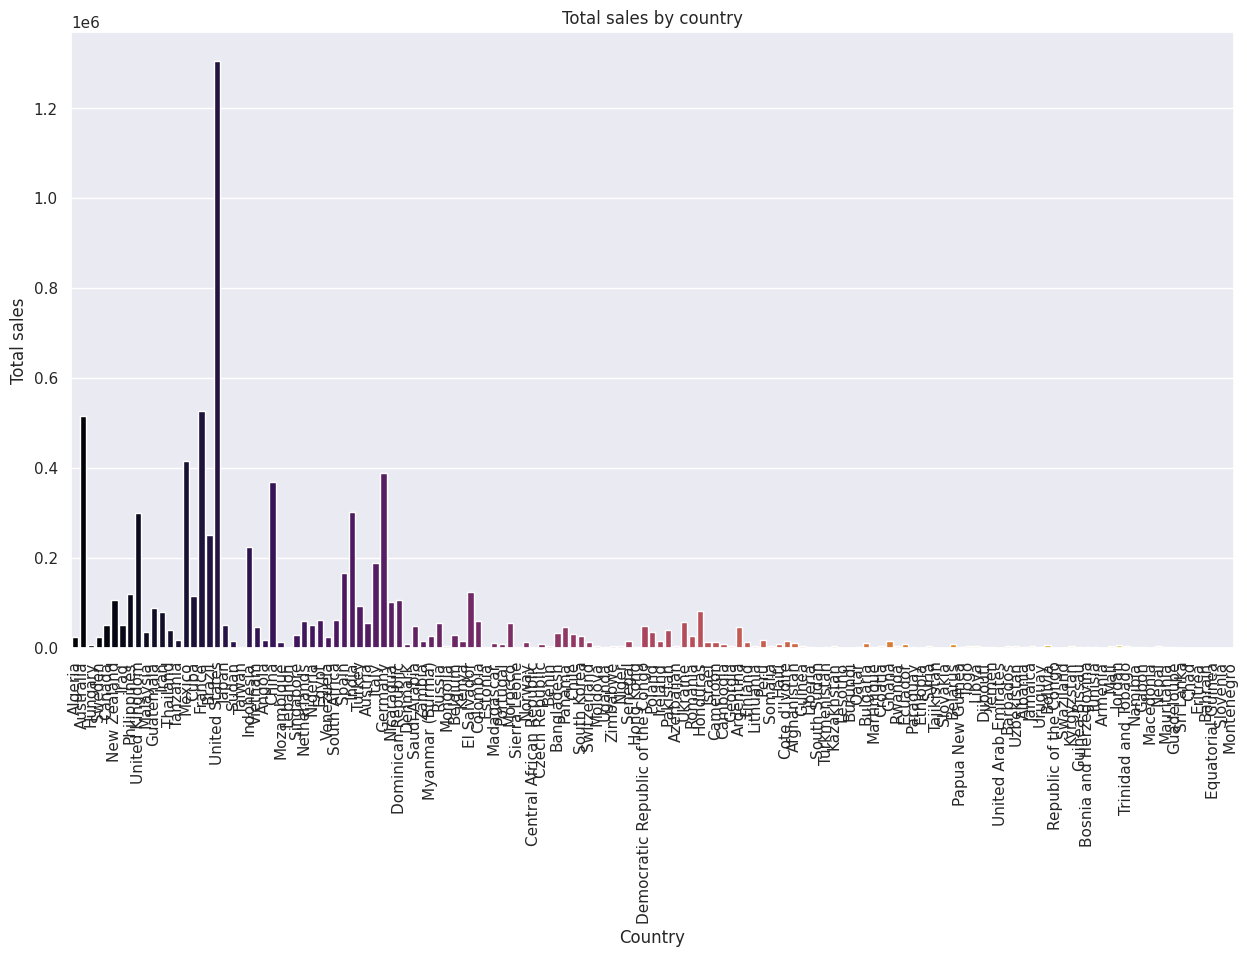

In [394]:
sns.barplot(x='country', y='sales', data=df, estimator=sum, ci=None, palette='inferno')
plt.title('Total sales by country')
plt.xlabel('Country')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='center')
plt.show()

Lets do just top 20

<ipython-input-395-fde03e3135ea>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-395-fde03e3135ea>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




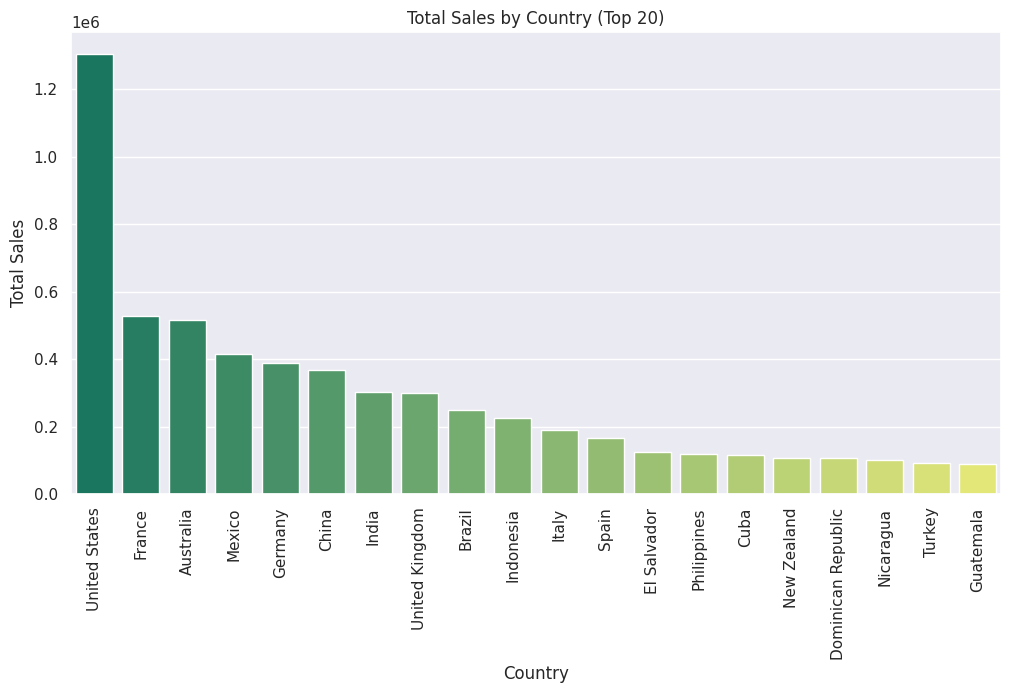

In [395]:
country_sales = df.groupby('country')['sales'].sum().nlargest(20).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='sales', data=country_sales, ci=None, palette='summer')
plt.title('Total Sales by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

<ipython-input-396-97685c49e04b>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-396-97685c49e04b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




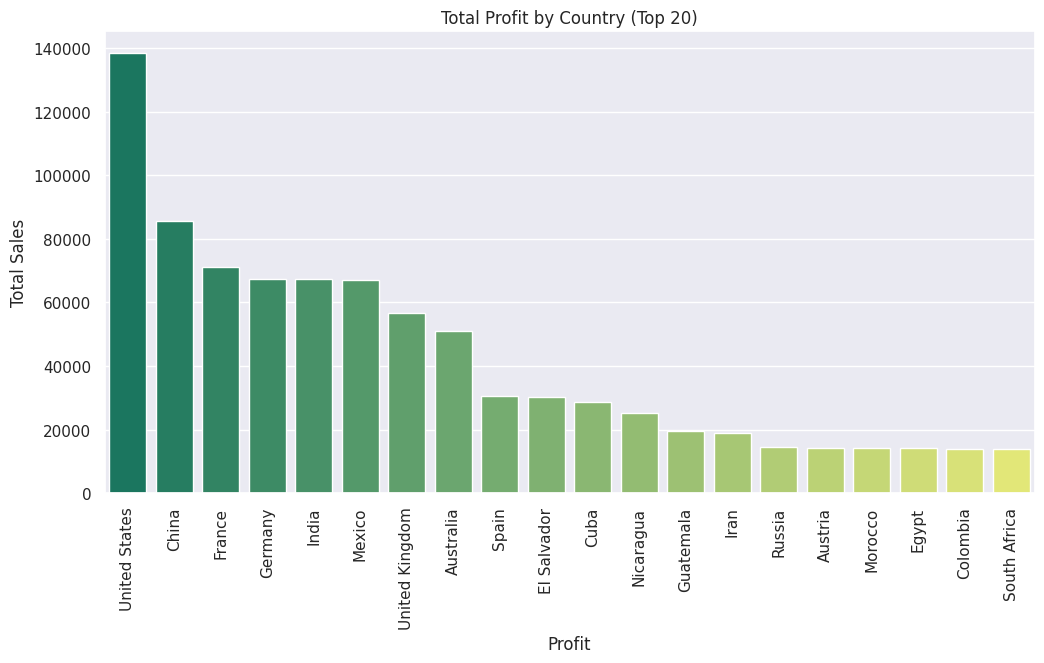

In [396]:
country_profit = df.groupby('country')['profit'].sum().nlargest(20).reset_index()

# Plot the top 20 countries
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(x='country', y='profit', data=country_profit, ci=None, palette='summer')
plt.title('Total Profit by Country (Top 20)')
plt.xlabel('Profit')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center')
plt.show()

The US is our largest market. Lets look into states within the US

<ipython-input-397-b7bf82261231>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Washington'),
  Text(3, 0, 'Michigan'),
  Text(4, 0, 'Virginia'),
  Text(5, 0, 'Georgia'),
  Text(6, 0, 'Kentucky'),
  Text(7, 0, 'Indiana'),
  Text(8, 0, 'Massachusetts'),
  Text(9, 0, 'New Jersey'),
  Text(10, 0, 'Wisconsin'),
  Text(11, 0, 'Maryland'),
  Text(12, 0, 'Delaware'),
  Text(13, 0, 'Minnesota'),
  Text(14, 0, 'Connecticut'),
  Text(15, 0, 'Arkansas'),
  Text(16, 0, 'Oklahoma'),
  Text(17, 0, 'Mississippi'),
  Text(18, 0, 'Alabama'),
  Text(19, 0, 'Missouri')])

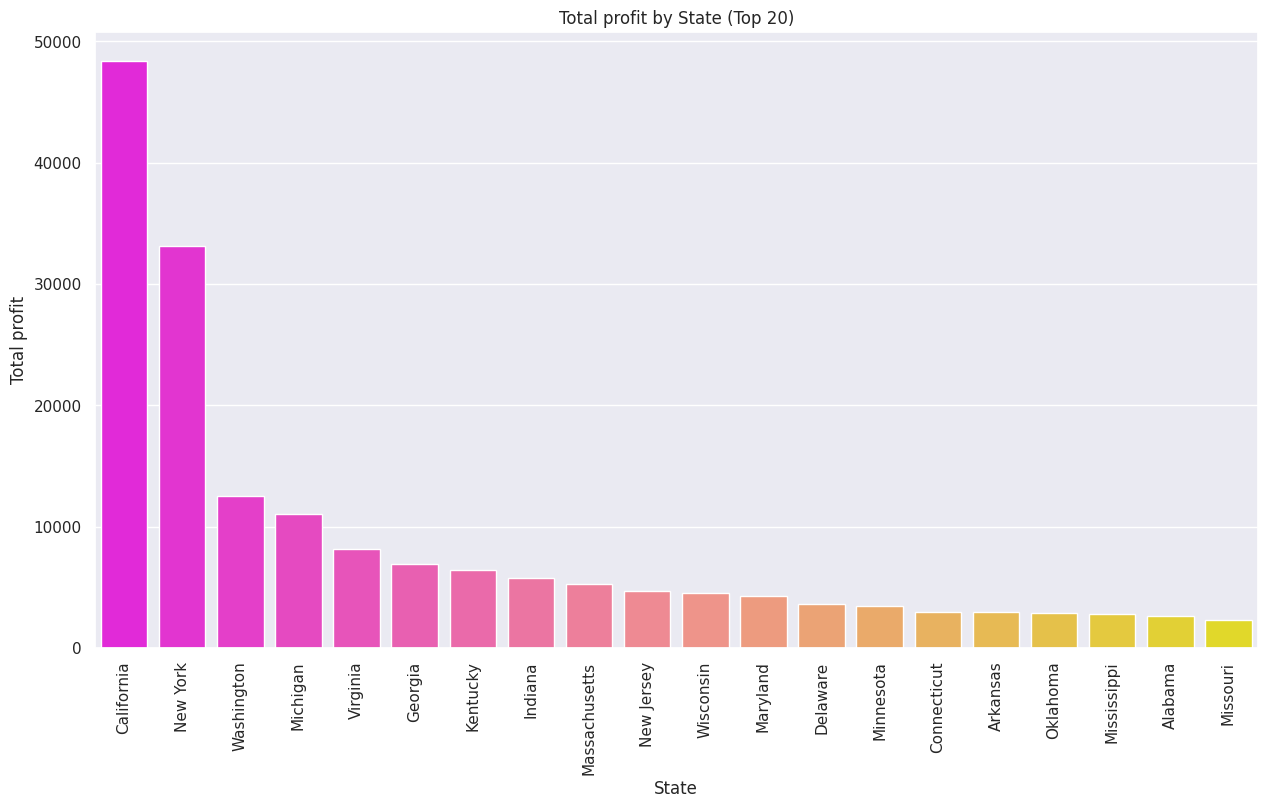

In [397]:
usa_data = df[df['country'] == 'United States']
state_sales = usa_data.groupby('state')['profit'].sum().nlargest(20).reset_index()
sns.barplot(x='state', y='profit', data=state_sales, palette='spring')
plt.title('Total profit by State (Top 20)')
plt.xlabel('State')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')

<ipython-input-398-bbd08df2b375>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Texas'),
  Text(1, 0, 'Illinois'),
  Text(2, 0, 'Pennsylvania'),
  Text(3, 0, 'Ohio'),
  Text(4, 0, 'Colorado'),
  Text(5, 0, 'Arizona'),
  Text(6, 0, 'Oregon'),
  Text(7, 0, 'Florida'),
  Text(8, 0, 'Tennessee'),
  Text(9, 0, 'District of Columbia'),
  Text(10, 0, 'West Virginia'),
  Text(11, 0, 'North Dakota'),
  Text(12, 0, 'South Dakota'),
  Text(13, 0, 'Montana'),
  Text(14, 0, 'Maine'),
  Text(15, 0, 'Vermont'),
  Text(16, 0, 'Idaho'),
  Text(17, 0, 'Iowa'),
  Text(18, 0, 'Nevada'),
  Text(19, 0, 'Kansas')])

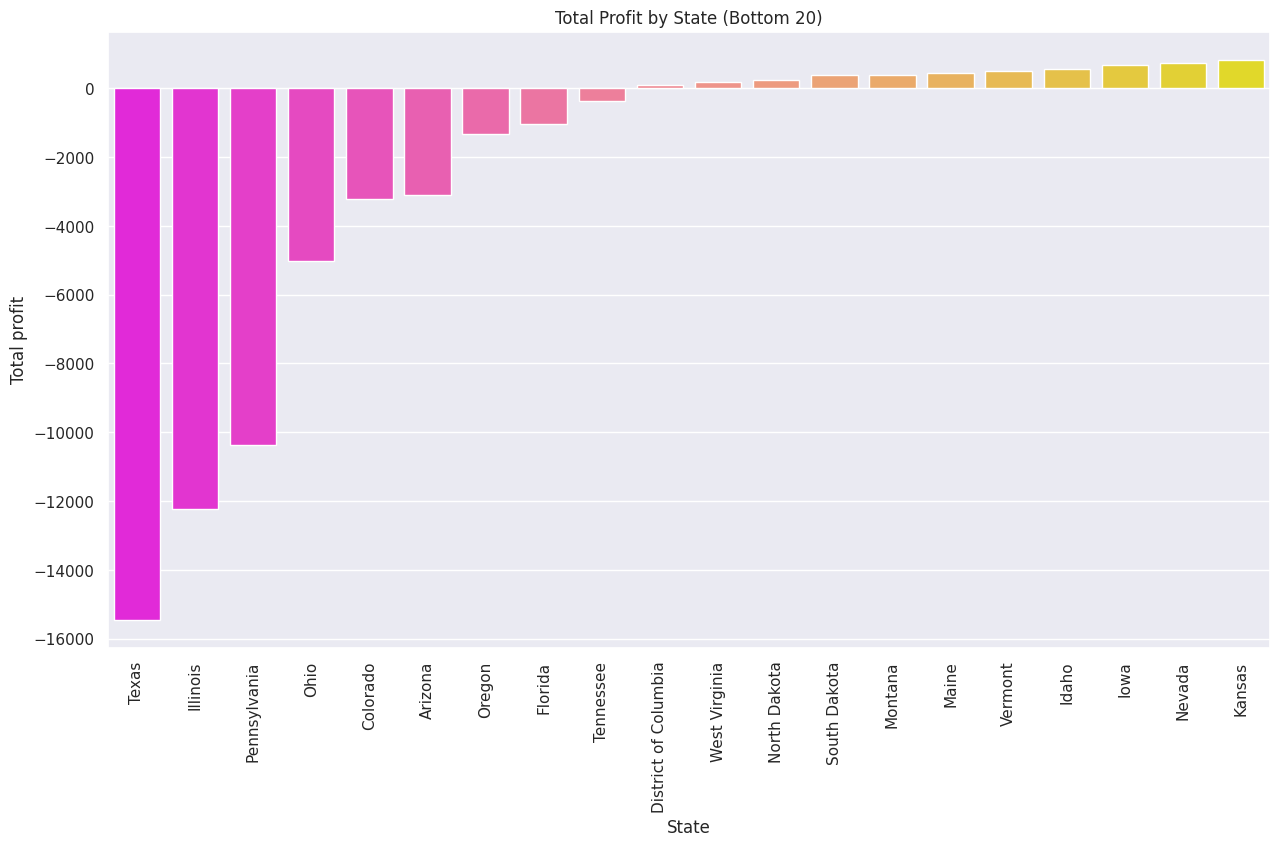

In [398]:
usa_data = df[df['country'] == 'United States']
state_sales = usa_data.groupby('state')['profit'].sum().nsmallest(20).reset_index()
sns.barplot(x='state', y='profit', data=state_sales, palette='spring')
plt.title('Total Profit by State (Bottom 20)')
plt.xlabel('State')
plt.ylabel('Total profit')
plt.xticks(rotation=90, ha='center')

Very surprised that Texas operates at such a big loss

Lets see relative size of markets of all states in all countries

In [399]:
state_sales = df[['country','state','sales']].groupby(['country','state'])['sales'].sum().reset_index()
fig = px.treemap(state_sales,path=['country','state'], values='sales')
fig.update_layout(height=1000,title='State-wise Sales',)

In [400]:
#top_sp=pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])
#top_sp.sort_values('quantity',ascending=False)[:10]

BREAKLINE $!!@#$%$#@!@#$%$#@!@#$%^^^%$#@!!@#@#$%% EVERYTHING BELOW IS EXPERIMENTAL

Breakdown of sales over time

*   Best month
*   Are we growing as a company?




Best customers (by name)

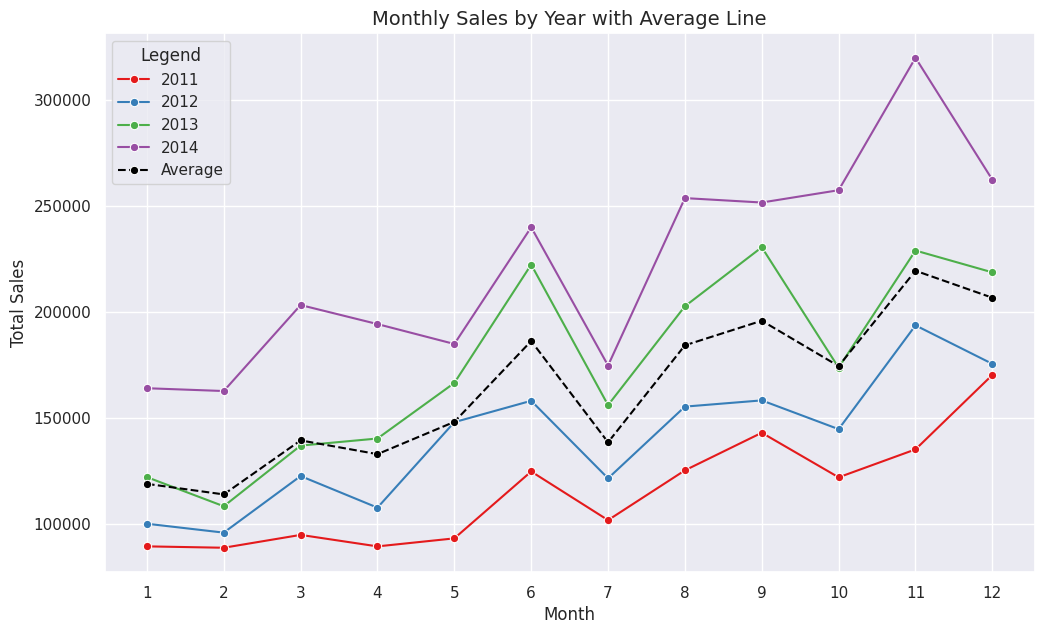

In [401]:
df_time = df[['order_date', 'segment', 'sales', 'quantity', 'discount', 'profit']].copy()
df_time['Month'] = df_time['order_date'].dt.month
df_time['Year'] = df_time['order_date'].dt.year

monthly_sales = df_time.groupby(['Year', 'Month'])['sales'].sum().reset_index()
avg_monthly_sales = monthly_sales.groupby('Month')['sales'].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_sales, x='Month', y='sales', hue='Year', marker='o', palette='Set1')
sns.lineplot(data=avg_monthly_sales, x='Month', y='sales', label='Average', color='black', linestyle='--', marker='o')
plt.title('Monthly Sales by Year with Average Line', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Legend')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Segment'

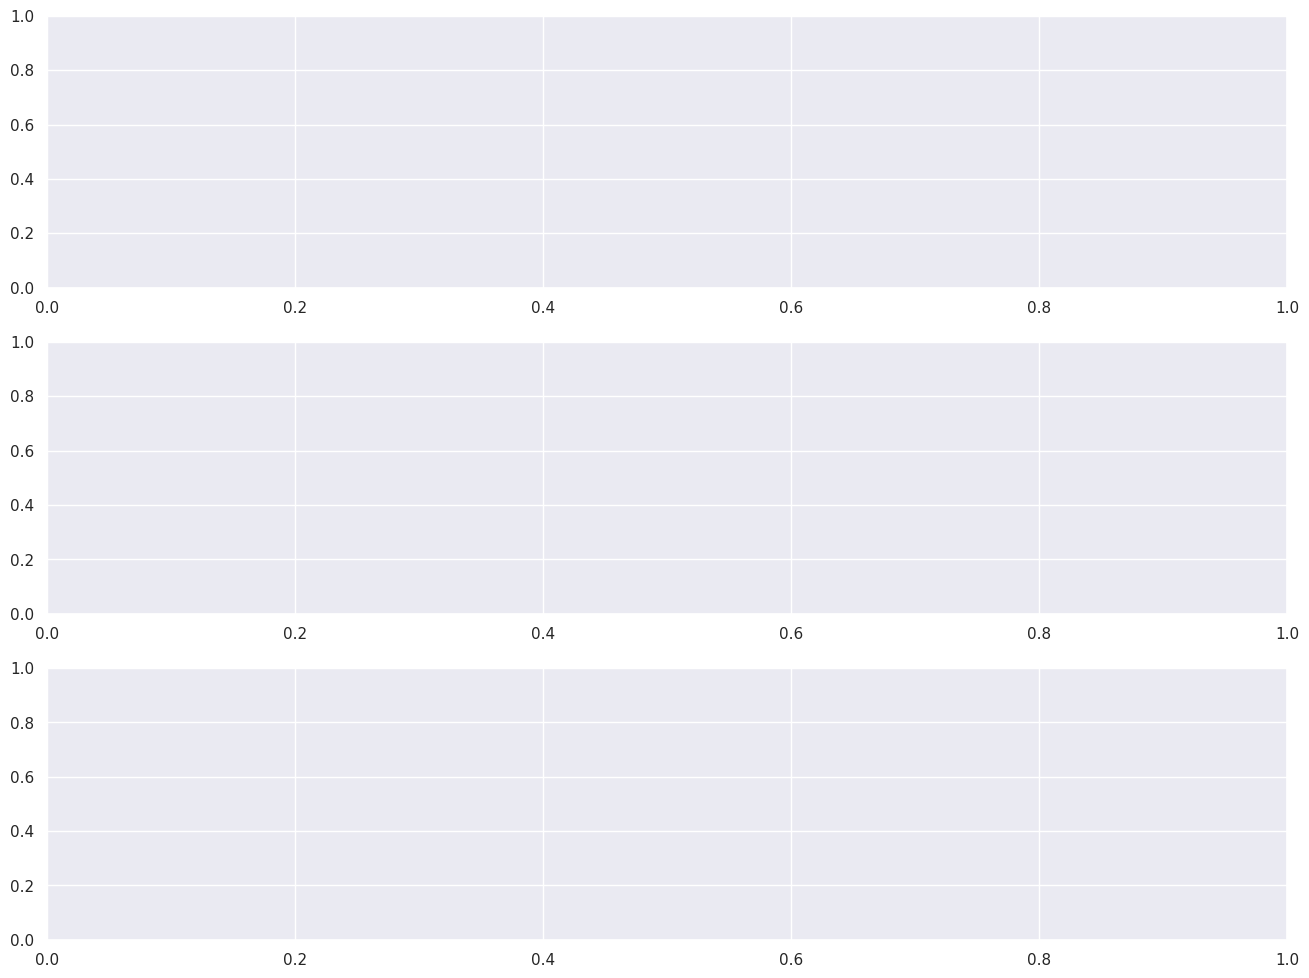

In [403]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharey=True)
axes = axes.flatten()
for i in range(3):
  monthly_sales = df_time[df_time.Segment == segment[i]].groupby(['Year', 'Month'])['sales'].sum().reset_index()
  avg_monthly_sales = monthly_sales.groupby('Month')['Sales'].mean().reset_index()
  sns.lineplot(data=monthly_sales, x='Month', y='sales', hue='Year', marker='o', palette='Set1', ax=axes[i])
  sns.lineplot(data=avg_monthly_sales, x='Month', y='Sales', label='Average', color='black', linestyle='--', marker='o', ax=axes[i])
  axes[i].set_title(f'Average Sales for {segments[i]}')
  axes[i].set_ylabel('Average Value')
  axes[i].grid(True)
  axes[i].legend(title='Legend')
  plt.tight_layout()
  plt.show()

In [404]:
print('The most recent Order Date is:',df['order_date'].max())
print('The first Order Date is:',df['order_date'].min())

The most recent Order Date is: 2014-12-31 00:00:00
The first Order Date is: 2011-01-01 00:00:00


In [405]:
df1 = df.iloc[:, 10:27]
df1.head(10)

,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,order_month,profit_margin,lead_time
0,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,January,0.260147,151
1,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,January,0.300300,212
2,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,January,0.449091,120
3,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,January,-0.579000,120
4,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,January,0.331316,212
5,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.0,2,0.1,15.342,1.80,Medium,2011,January,0.278945,212
6,TEC-OKI-10002750,Technology,Machines,"Okidata Inkjet, Wireless",314.0,1,0.0,3.120,24.10,Medium,2011,Fabruary,0.009936,120
7,OFF-AP-10000304,Office Supplies,Appliances,"Hoover Microwave, White",276.0,1,0.1,110.412,125.32,Critical,2011,March,0.400043,0
8,TEC-CO-10004182,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.0,4,0.4,-319.464,107.10,Low,2011,March,-0.350289,184
9,FUR-NOV-10002791,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667.0,4,0.0,253.320,81.26,High,2011,March,0.379790,122
